In [3]:
from thesis import ROOT
import os
import matplotlib.pyplot as plt
import numpy as np
from typing import Optional
import scanpy as sc


FIGURES_PATH = ROOT / "report" / "assets" / "figures"
os.makedirs(FIGURES_PATH, exist_ok=True)

In [4]:
from typing import Optional
import matplotlib.pyplot as plt
import scanpy as sc

from thesis.datasets import SplitDatasetPipeline


def get_umap_counts(
    pipeline: SplitDatasetPipeline,
    filename: Optional[str] = None,
    target_cell_type: str = "Hepatocytes - portal",
    condition: str = "Dose",
):
    dataset = pipeline.dataset
    dataset.obs["split"] = "~train"
    dataset.obs["splittest"] = "~test"

    cell_type_key = pipeline.cell_type_key

    train_adata, validation_adata = pipeline.split_dataset_to_train_validation(
        target_cell_type=target_cell_type
    )
    test_adata_input = pipeline.get_ctrl_test(target_cell_type=target_cell_type)
    test_adata_evaluation = pipeline.get_stim_test(target_cell_type=target_cell_type)

    if condition == "Dose":
        dataset.obs["Dose"] = dataset.obs["Dose"].astype("category")

    dataset.obs.loc[train_adata.obs_names, "split"] = "train"
    dataset.obs.loc[test_adata_input.obs_names, "splittest"] = "input"
    dataset.obs.loc[test_adata_evaluation.obs_names, "splittest"] = "evaluation"

    def _plot_single_umap(color_key, title, palette=None, suffix=None):
        fig, ax = plt.subplots(figsize=(8, 6))

        sc.pl.umap(
            dataset,
            color=color_key,
            show=False,
            ax=ax,
            palette=palette,
        )
        ax.set_title(title)

        fig.tight_layout()
        if filename is not None:
            # e.g. filename="umap_counts" -> "umap_counts_cell_type.png"
            save_name = f"{filename}_{suffix if suffix else color_key}.png"
            fig.savefig(FIGURES_PATH / save_name, dpi=300, bbox_inches="tight")
            print(f"file saved at {FIGURES_PATH / save_name}")

        plt.show()
        plt.close(fig)

    # 1. Cell type
    _plot_single_umap(
        color_key=cell_type_key,
        title="Cell Type",
        suffix="cell_type",
    )

    # 2. Condition (e.g. Dose)
    _plot_single_umap(
        color_key=condition,
        title=condition,
        suffix="condition",
    )

    # 3. Train / non-train
    _plot_single_umap(
        color_key="split",
        title="Train",
        palette={
            "~train": plt.cm.Reds(0.8),
            "train": plt.cm.Blues(0.5),
        },
        suffix="train",
    )

    # 4. Test splits
    _plot_single_umap(
        color_key="splittest",
        title="Test",
        palette={
            "~test": plt.cm.Reds(0.8),
            "input": plt.cm.Blues(0.5),
            "evaluation": plt.cm.Greens(0.4),
        },
        suffix="test",
    )


Preprocessing started
Preprocessing finished


/home/thodkatz/repos/personal/thesis/thesis/datasets.py:463: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  control.obs["condition"] = "control"
/home/thodkatz/repos/personal/thesis/thesis/datasets.py:464: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  perturb.obs["condition"] = "stimulated"


file saved at /home/thodkatz/repos/personal/thesis/report/assets/figures/nault_umap_split_30_cell_type.png


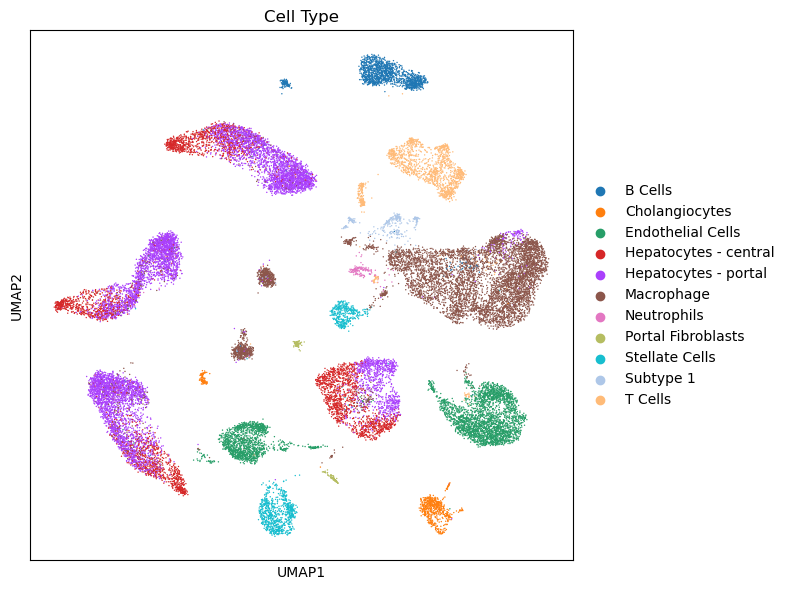

file saved at /home/thodkatz/repos/personal/thesis/report/assets/figures/nault_umap_split_30_condition.png


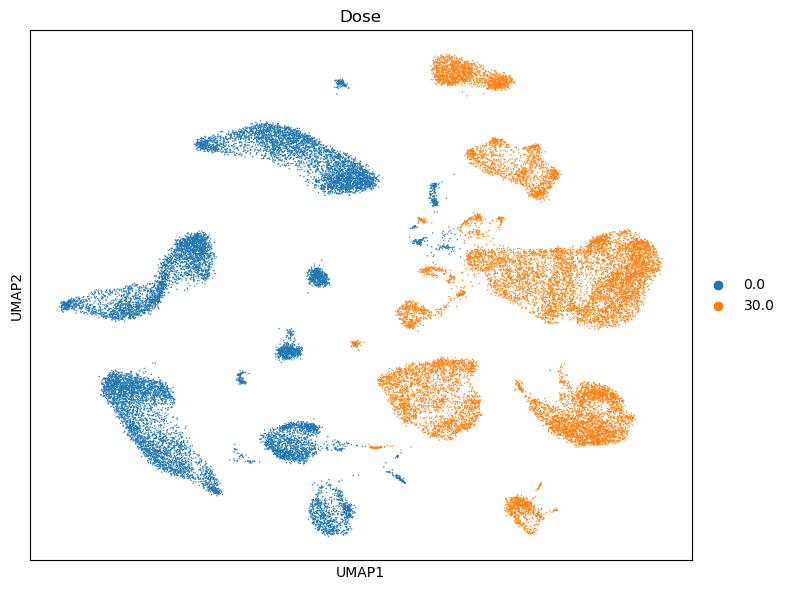

file saved at /home/thodkatz/repos/personal/thesis/report/assets/figures/nault_umap_split_30_train.png


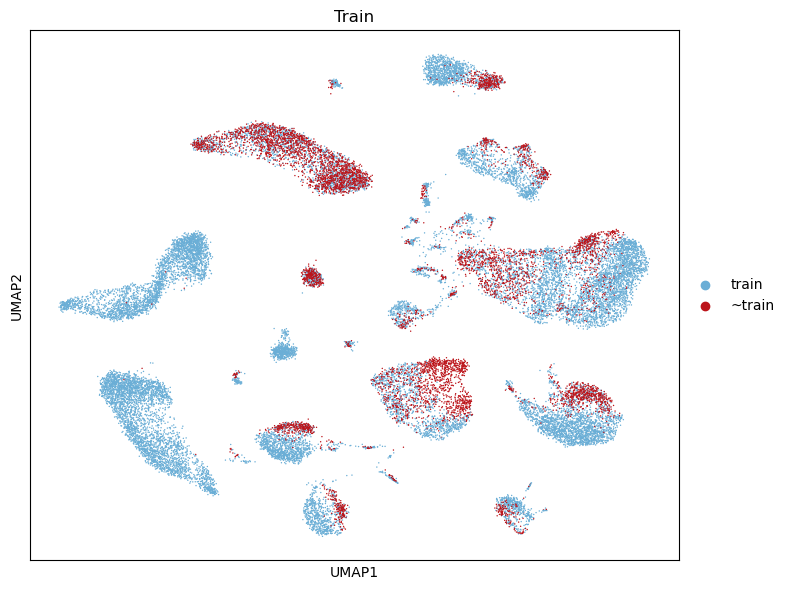

file saved at /home/thodkatz/repos/personal/thesis/report/assets/figures/nault_umap_split_30_test.png


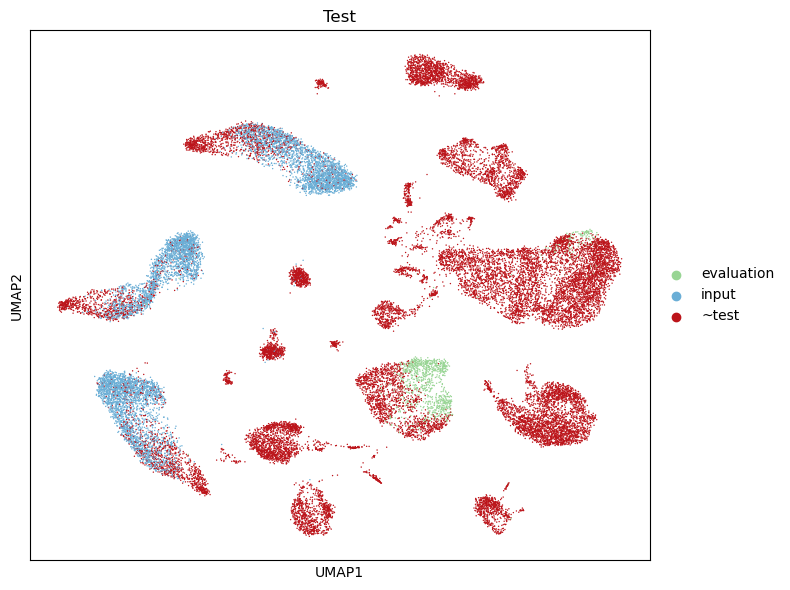

In [3]:
from thesis.datasets import NaultPipeline, NaultSinglePipeline

nault_single = NaultSinglePipeline(
    dataset_pipeline=NaultPipeline(), dosages=30
)
dataset = nault_single.dataset

sc.pp.pca(dataset)
sc.pp.neighbors(dataset)
sc.tl.umap(dataset)

get_umap_counts(nault_single, 'nault_umap_split_30')

In [4]:
from thesis.datasets import NaultPipeline, NaultMultiplePipeline

nault_multiple = NaultMultiplePipeline(
    dataset_pipeline=NaultPipeline()
)
dataset = nault_multiple.dataset

sc.pp.pca(dataset)
sc.pp.neighbors(dataset)
sc.tl.umap(dataset)


Preprocessing started
Preprocessing finished


/home/thodkatz/.conda/envs/thesis/lib/python3.10/site-packages/scanpy/preprocessing/_pca/__init__.py:384: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = x_pca


file saved at /home/thodkatz/repos/personal/thesis/report/assets/figures/nault_umap_split_multiple_cell_type.png


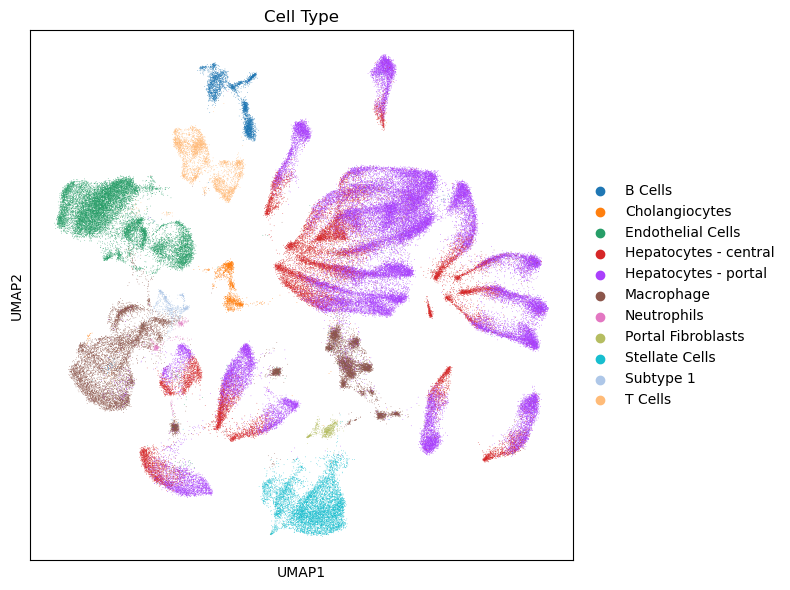

file saved at /home/thodkatz/repos/personal/thesis/report/assets/figures/nault_umap_split_multiple_condition.png


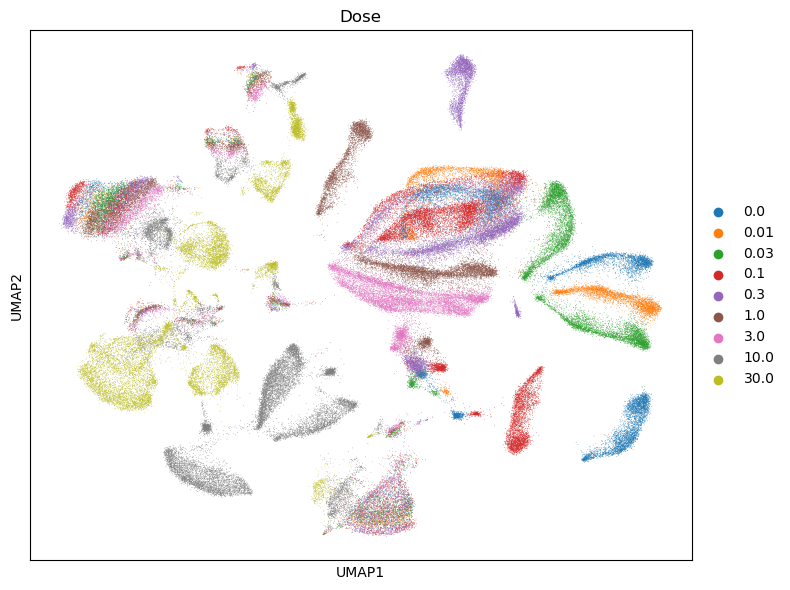

file saved at /home/thodkatz/repos/personal/thesis/report/assets/figures/nault_umap_split_multiple_train.png


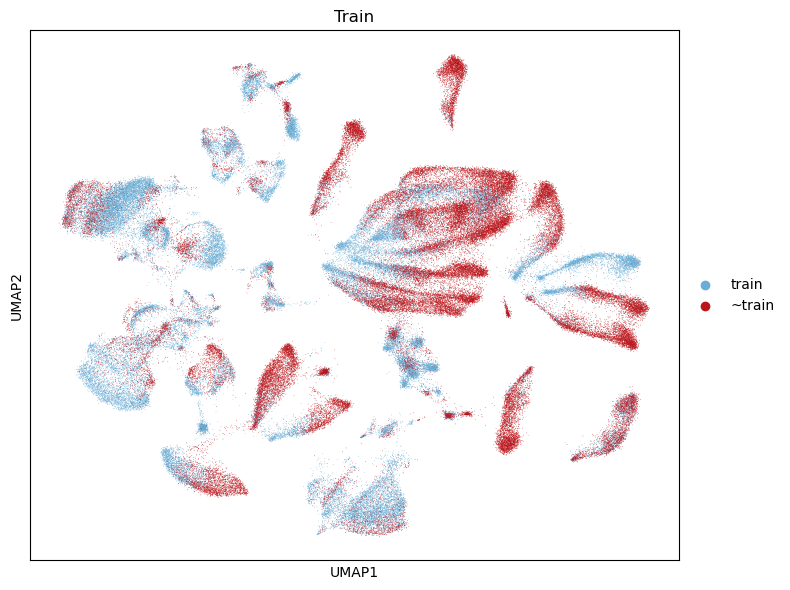

file saved at /home/thodkatz/repos/personal/thesis/report/assets/figures/nault_umap_split_multiple_test.png


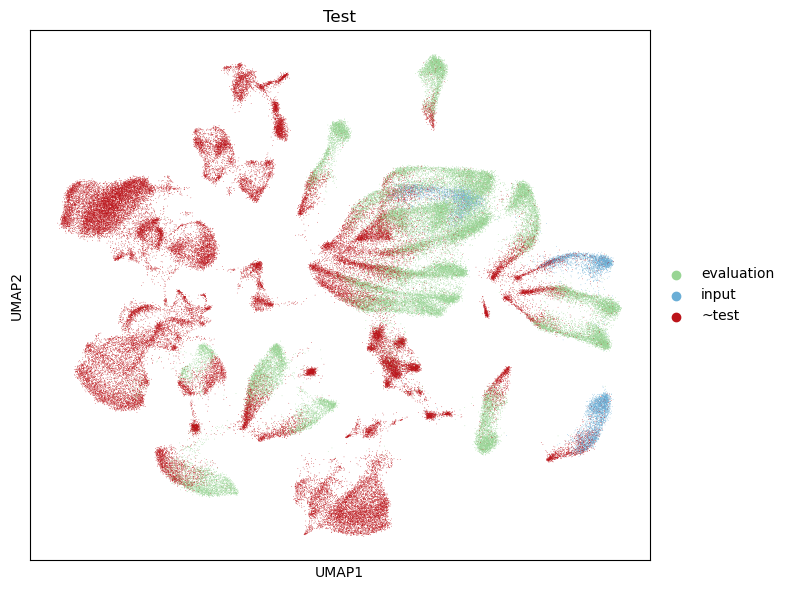

In [5]:
get_umap_counts(nault_multiple, 'nault_umap_split_multiple')

In [8]:
from thesis.datasets import NaultLiverTissuePipeline, NaultSinglePipeline

nault_single = NaultSinglePipeline(
    dataset_pipeline=NaultLiverTissuePipeline(), dosages=30
)
dataset = nault_single.dataset

sc.pp.pca(dataset)
sc.pp.neighbors(dataset)
sc.tl.umap(dataset)



Preprocessing started
Preprocessing finished


/g/kreshuk/katzalis/repos/thesis/thesis/datasets.py:463: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  control.obs["condition"] = "control"
/g/kreshuk/katzalis/repos/thesis/thesis/datasets.py:464: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  perturb.obs["condition"] = "stimulated"


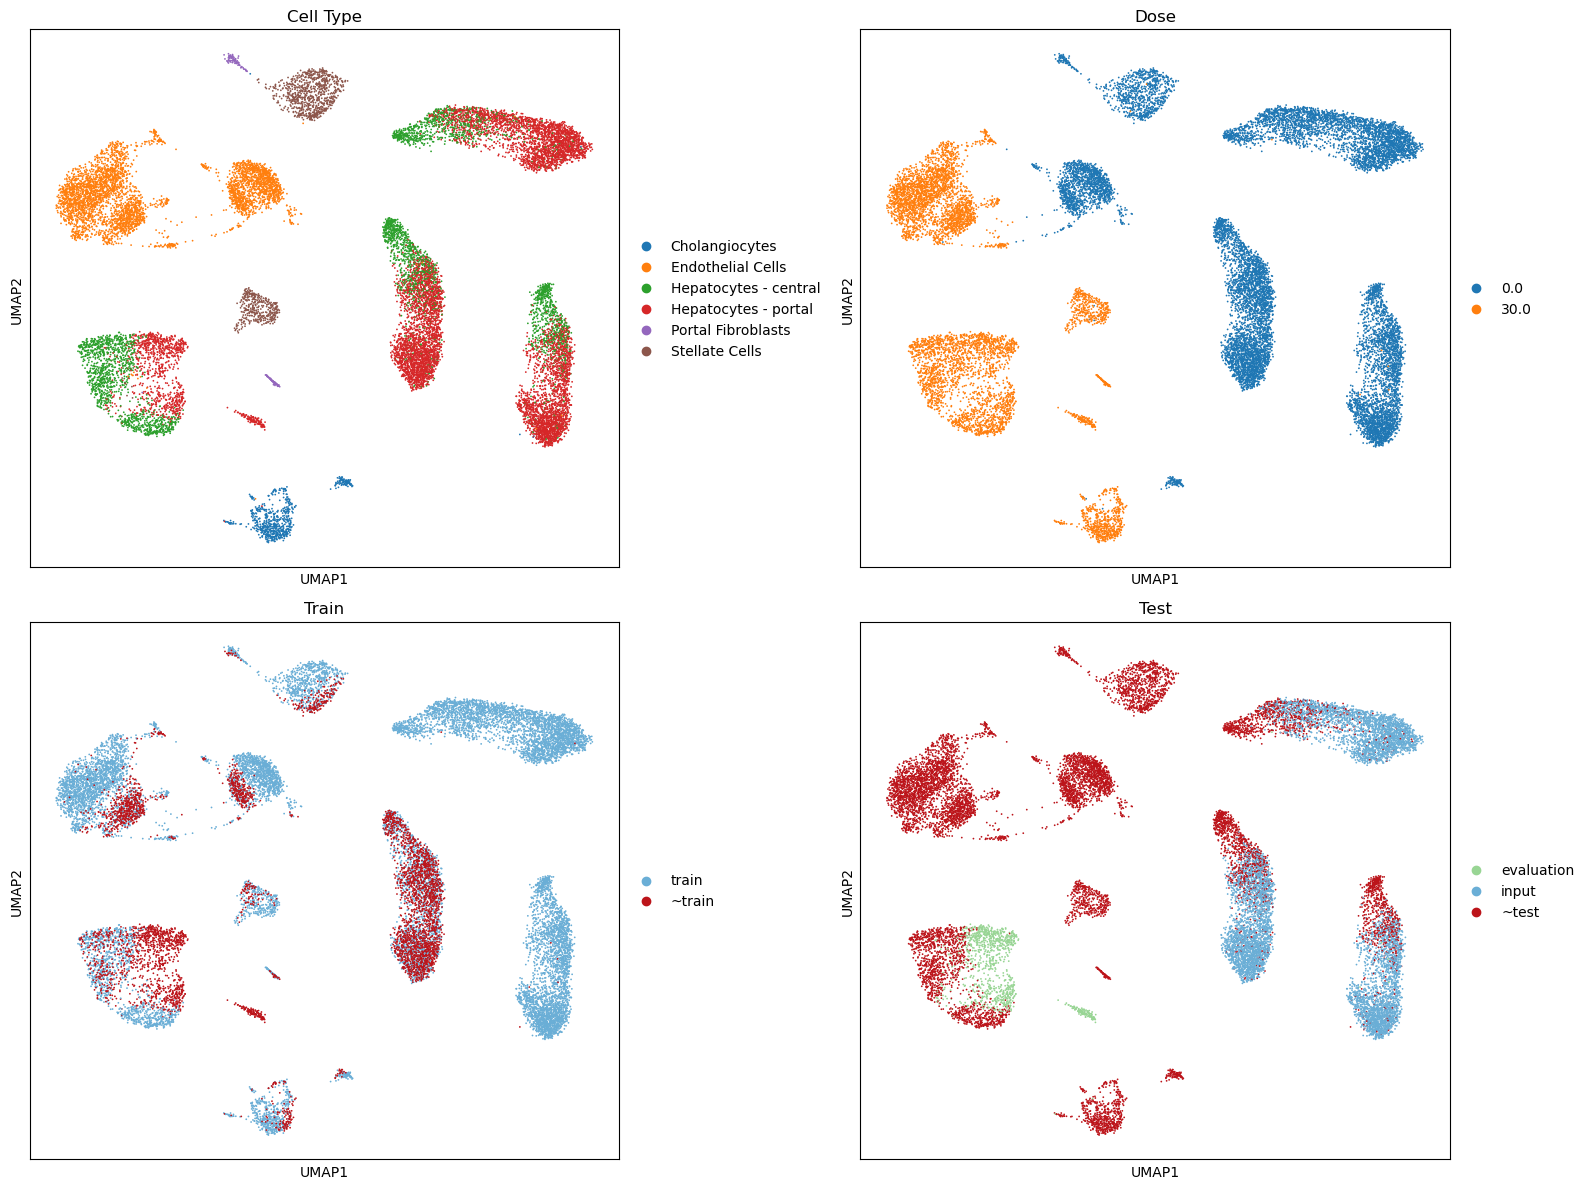

In [9]:
get_umap_counts(nault_single, 'nault_liver_umap_split_30')

In [10]:
from thesis.datasets import NaultLiverTissuePipeline, NaultMultiplePipeline

nault_multiple = NaultMultiplePipeline(
    dataset_pipeline=NaultLiverTissuePipeline()
)
dataset = nault_multiple.dataset

sc.pp.pca(dataset)
sc.pp.neighbors(dataset)
sc.tl.umap(dataset)



Preprocessing started
Preprocessing finished


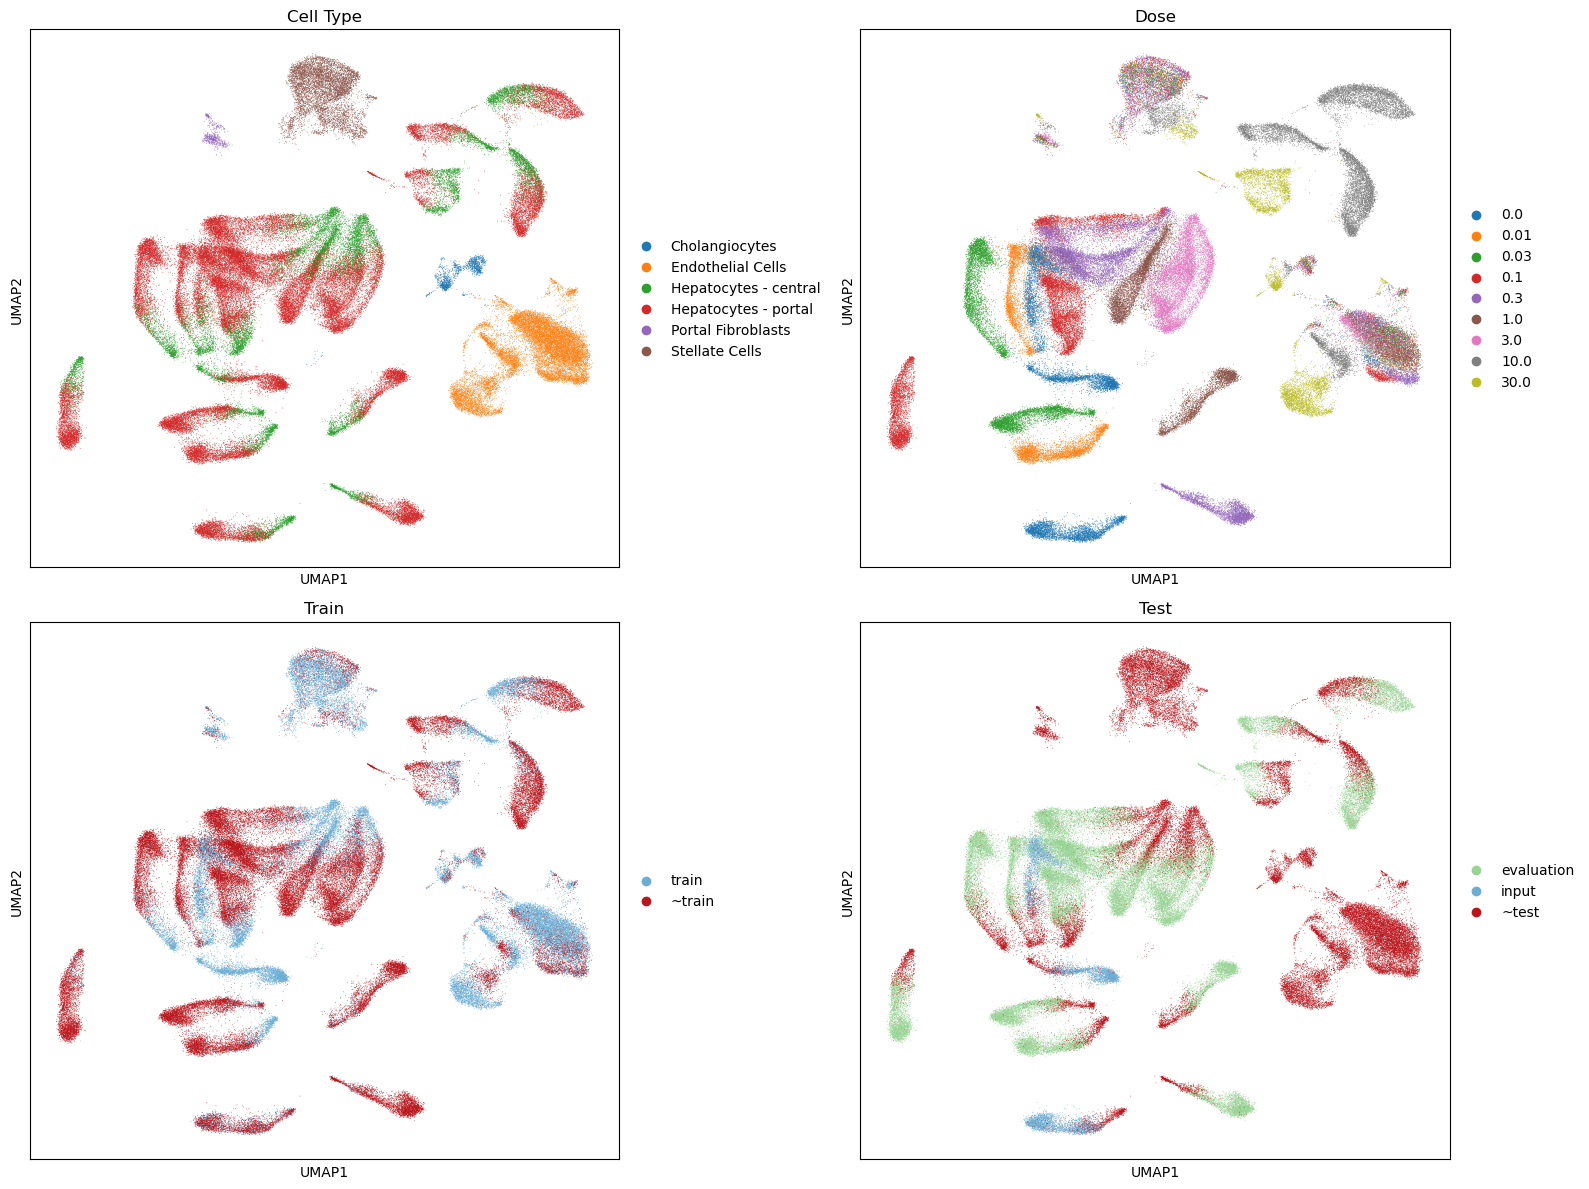

In [11]:
get_umap_counts(nault_multiple, 'nault_liver_umap_split_multiple')

In [6]:
from thesis.datasets import PbmcPipeline, PbmcSinglePipeline

pbmc = PbmcSinglePipeline(
    dataset_pipeline=PbmcPipeline()
)
dataset = pbmc.dataset

sc.pp.pca(dataset)
sc.pp.neighbors(dataset)
sc.tl.umap(dataset)

/home/thodkatz/repos/personal/thesis/thesis/datasets.py:590: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  control.obs[dose_key] = 0.0
/home/thodkatz/repos/personal/thesis/thesis/datasets.py:591: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  perturb.obs[dose_key] = -1.0


file saved at /home/thodkatz/repos/personal/thesis/report/assets/figures/pbmc_split_cell_type.png


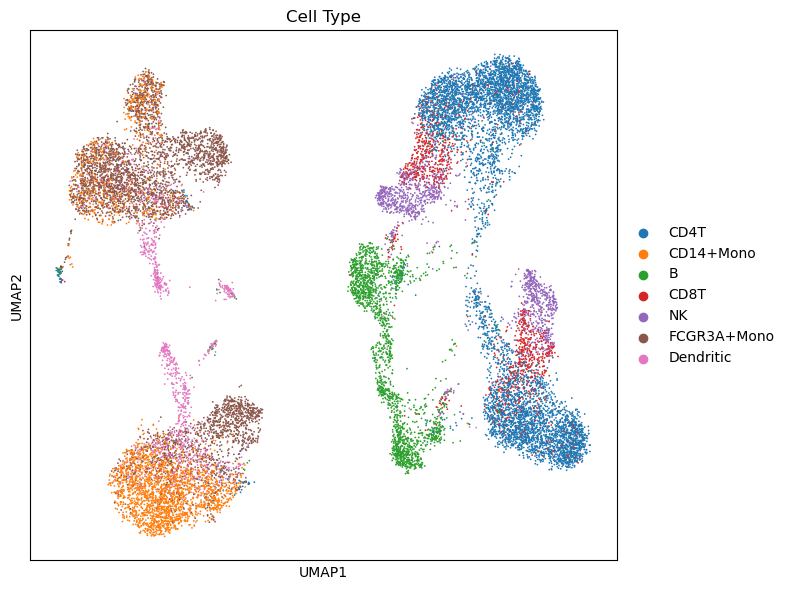

file saved at /home/thodkatz/repos/personal/thesis/report/assets/figures/pbmc_split_condition.png


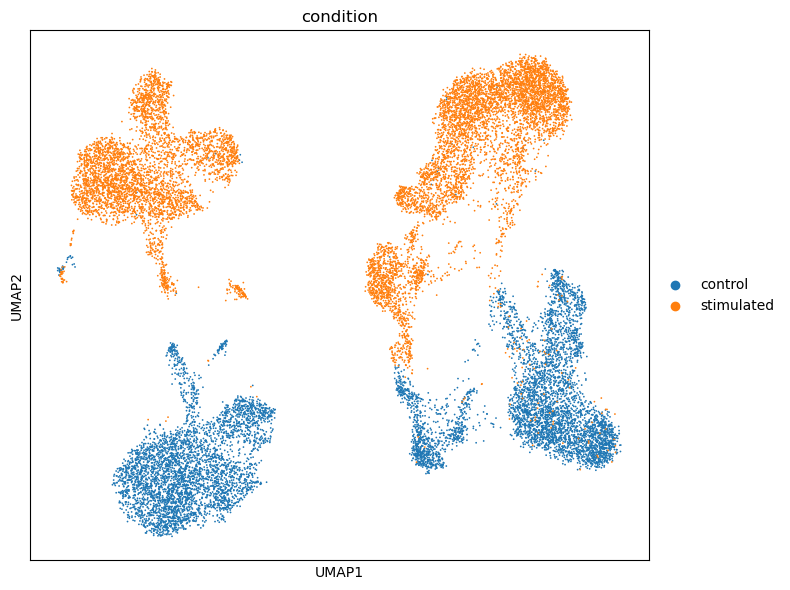

file saved at /home/thodkatz/repos/personal/thesis/report/assets/figures/pbmc_split_train.png


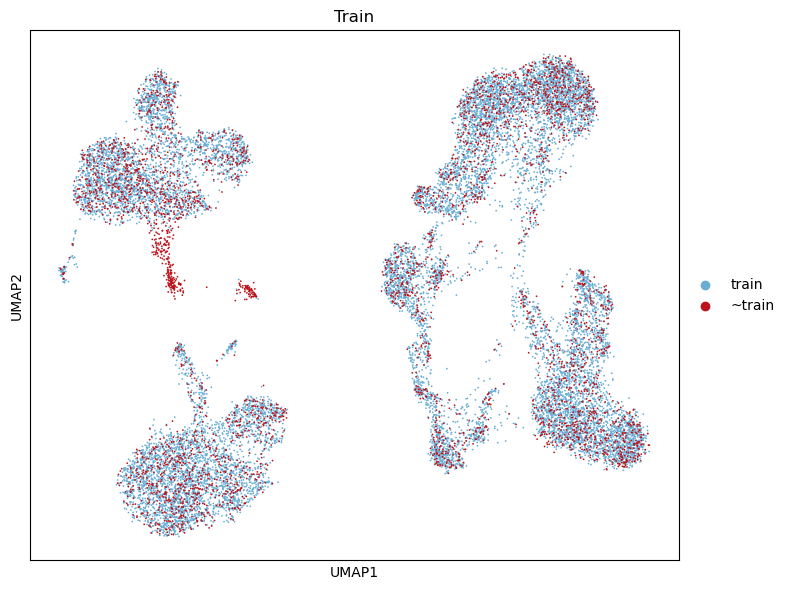

file saved at /home/thodkatz/repos/personal/thesis/report/assets/figures/pbmc_split_test.png


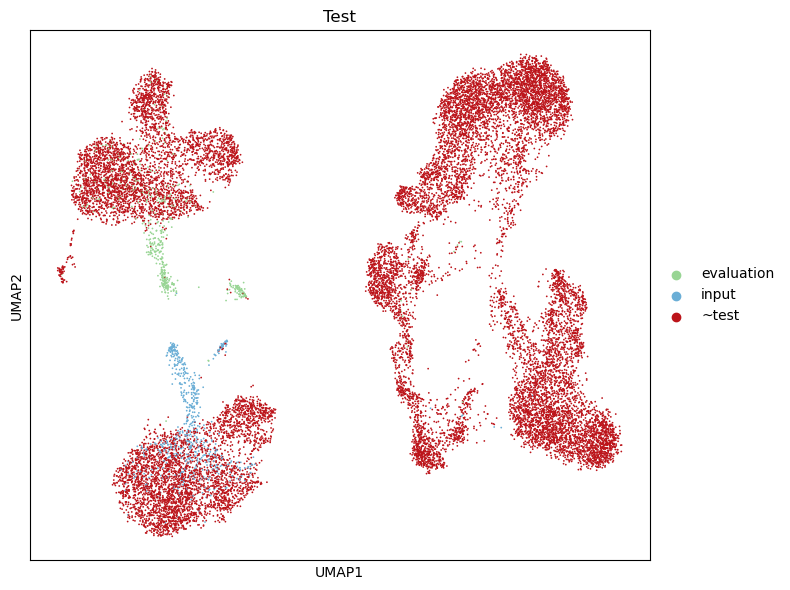

In [17]:
get_umap_counts(pbmc, filename='pbmc_split', target_cell_type='Dendritic', condition='condition')

In [5]:
import matplotlib.pyplot as plt



def get_split_counts(pipeline, filename: Optional[str] = None, with_percentage: bool = False, ax=None):
    # Use the provided axis if available, otherwise create a new one (e.g., for standalone plotting)
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 10))

    dataset = pipeline.dataset
    width = 0.2
    cell_types = dataset.obs[pipeline.cell_type_key].unique().tolist()
    x = np.arange(len(cell_types))
    
    total_count = len(dataset)

    train_size_cell_types = []
    ctrl_test_size_cell_types = []
    stim_test_size_cell_types = []
    
    for cell_type in cell_types:
        train, validation = pipeline.split_dataset_to_train_validation(target_cell_type=cell_type)        
        ctrl_test = pipeline.get_ctrl_test(target_cell_type=cell_type)
        stim_test = pipeline.get_stim_test(target_cell_type=cell_type)
        
        train_count = len(train)
        ctrl_count = len(ctrl_test)
        stim_count = len(stim_test)
        
        print(f'{cell_type}: train={train_count}, ctrl test={ctrl_count}, stim test={stim_count}')
        
        if with_percentage:
            train_count = train_count / total_count * 100
            ctrl_count = ctrl_count / total_count * 100
            stim_count = stim_count / total_count * 100
            print(f'{cell_type} with percentage: train={train_count}, ctrl test={ctrl_count}, stim test={stim_count}')
        
        train_size_cell_types.append(train_count)
        ctrl_test_size_cell_types.append(ctrl_count)
        stim_test_size_cell_types.append(stim_count)
        
    # Plotting on the specified axis
    ax.bar(x - width, train_size_cell_types, width, label='train', color=plt.cm.Purples(0.3))
    ax.bar(x, ctrl_test_size_cell_types, width, label='test input', color=plt.cm.Reds(0.3))
    ax.bar(x + width, stim_test_size_cell_types, width, label='test evaluation', color=plt.cm.Greens(0.3))
    ax.set_xticks(x)
    ax.set_xticklabels(cell_types, rotation=45, ha='right')
    ax.set_ylabel('Number of cells' if not with_percentage else 'Percentage of cells')
    ax.set_xlabel('Target cell type')
    
    # Save the figure if filename is provided
    if filename is not None:
        fig.savefig(FIGURES_PATH / f'{filename}.pdf', dpi=300, bbox_inches='tight')
        
        
def subplot_counts(pipeline, filename: Optional[str] = None):
    fig, axs = plt.subplots(1, 2, figsize=(12, 10))

    get_split_counts(pipeline, ax=axs[0])
    get_split_counts(pipeline, with_percentage=True, ax=axs[1])
    
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, 1.05), ncol=3)
    
    plt.tight_layout()
    if filename is not None:
        fig.savefig(FIGURES_PATH / f'{filename}.pdf', dpi=300, bbox_inches='tight')
    plt.show()



Preprocessing started
Preprocessing finished
Stellate Cells: train=95833, ctrl test=826, stim test=6491
Hepatocytes - portal: train=61647, ctrl test=7492, stim test=49225
Endothelial Cells: train=89822, ctrl test=1445, stim test=14006
Cholangiocytes: train=99959, ctrl test=101, stim test=1333
Macrophage: train=89934, ctrl test=1411, stim test=13865
Hepatocytes - central: train=86209, ctrl test=2486, stim test=18521
B Cells: train=98313, ctrl test=120, stim test=3393
T Cells: train=98144, ctrl test=178, stim test=3603
Portal Fibroblasts: train=100580, ctrl test=84, stim test=556
Neutrophils: train=100733, ctrl test=42, stim test=366
Subtype 1: train=100447, ctrl test=60, stim test=724
Stellate Cells: train=95833, ctrl test=826, stim test=6491
Stellate Cells with percentage: train=75.86045848901273, ctrl test=0.6538534608321196, stim test=5.1382116395415105
Hepatocytes - portal: train=61647, ctrl test=7492, stim test=49225
Hepatocytes - portal with percentage: train=48.799157748084355, c

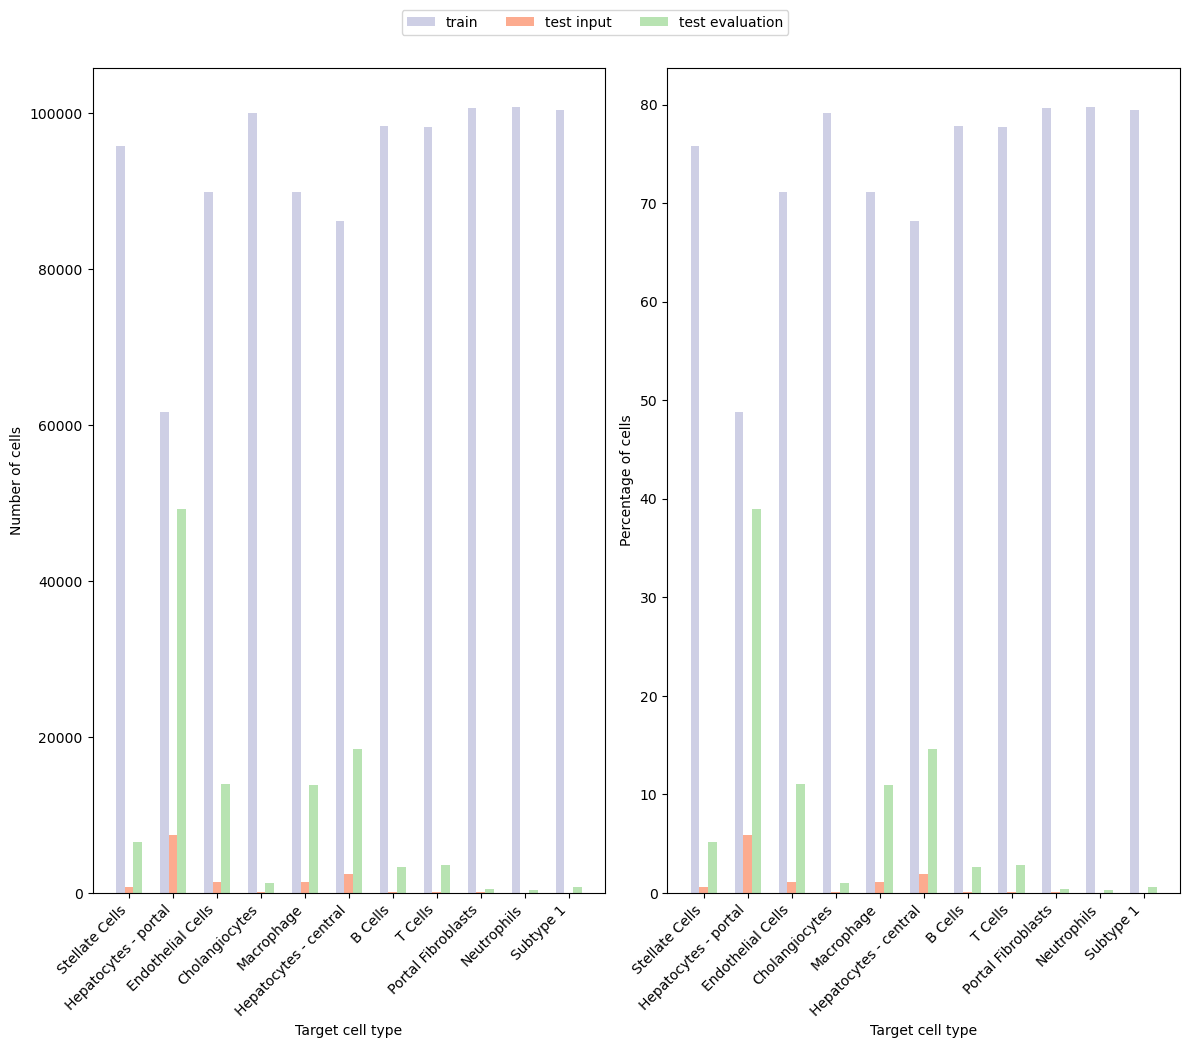

In [15]:
nault = NaultPipeline()
nault_multiple = NaultMultiplePipeline(
    dataset_pipeline=nault
)

subplot_counts(nault_multiple, filename='nault_bars_split_multiple')


Preprocessing started
Preprocessing finished
Stellate Cells: train=76842, ctrl test=826, stim test=6491
Hepatocytes - portal: train=42656, ctrl test=7492, stim test=49225
Endothelial Cells: train=70831, ctrl test=1445, stim test=14006
Cholangiocytes: train=80968, ctrl test=101, stim test=1333
Hepatocytes - central: train=67218, ctrl test=2486, stim test=18521
Portal Fibroblasts: train=81589, ctrl test=84, stim test=556
Stellate Cells: train=76842, ctrl test=826, stim test=6491
Stellate Cells with percentage: train=74.91956398806622, ctrl test=0.8053351013006259, stim test=6.328607920753466
Hepatocytes - portal: train=42656, ctrl test=7492, stim test=49225
Hepatocytes - portal with percentage: train=41.58883060663378, ctrl test=7.304564865549986, stim test=47.99348712048827
Endothelial Cells: train=70831, ctrl test=1445, stim test=14006
Endothelial Cells with percentage: train=69.05894740947292, ctrl test=1.4088489362946786, stim test=13.655597371448627
Cholangiocytes: train=80968, ctrl

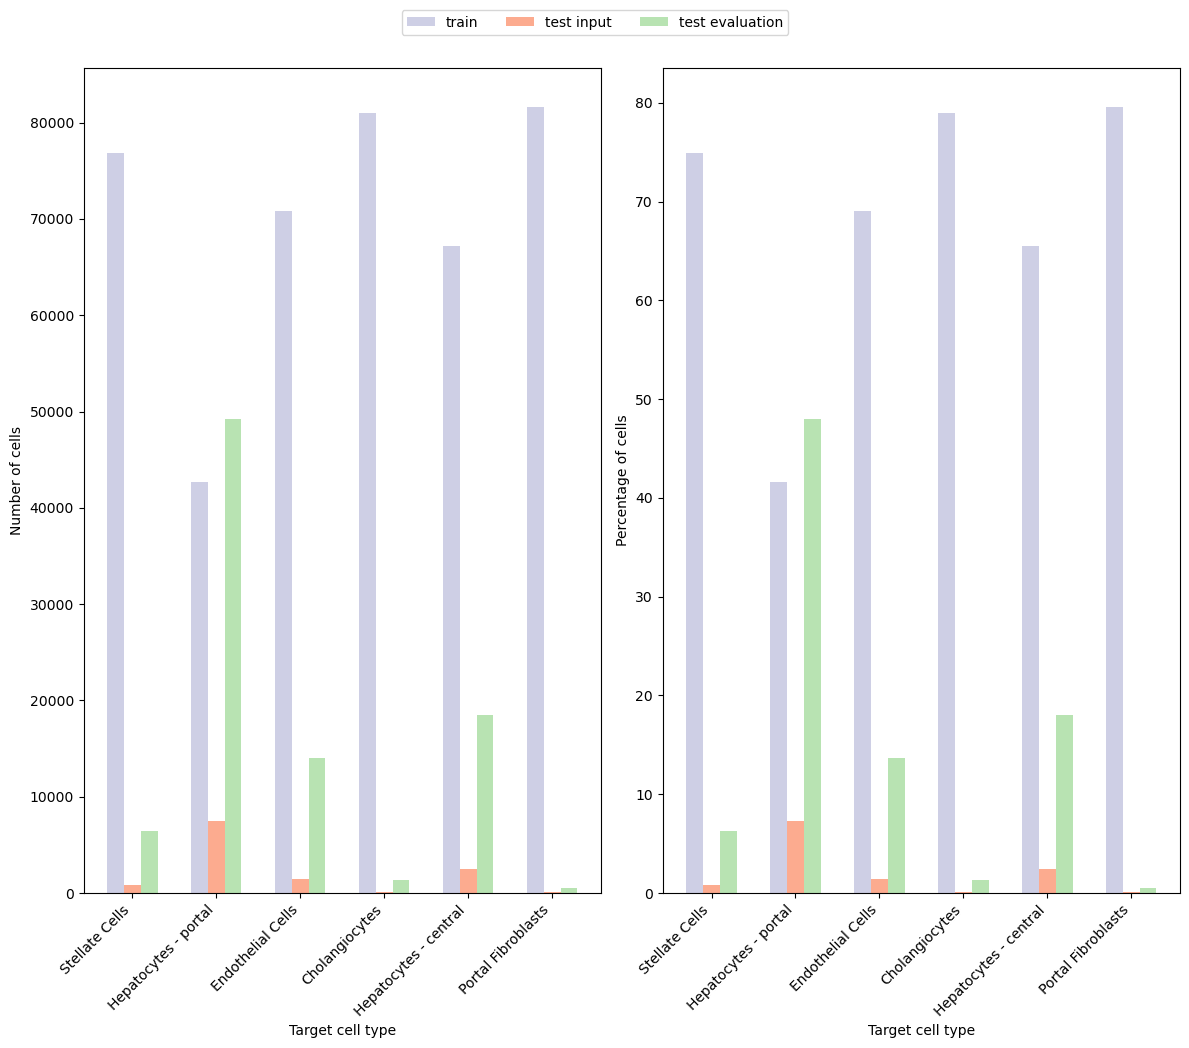

In [16]:
from thesis.datasets import NaultLiverTissuePipeline

nault = NaultLiverTissuePipeline()
nault_multiple = NaultMultiplePipeline(
    dataset_pipeline=nault
)

subplot_counts(nault_multiple, filename='nault_liver_bars_split_multiple')

Preprocessing started
Preprocessing finished


/home/thodkatz/repos/personal/thesis/thesis/datasets.py:463: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  control.obs["condition"] = "control"
/home/thodkatz/repos/personal/thesis/thesis/datasets.py:464: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  perturb.obs["condition"] = "stimulated"


Stellate Cells: train=23008, ctrl test=826, stim test=389
Hepatocytes - portal: train=22478, ctrl test=7492, stim test=1052
Endothelial Cells: train=21051, ctrl test=1445, stim test=2836
Cholangiocytes: train=22842, ctrl test=101, stim test=597
Macrophage: train=18948, ctrl test=1411, stim test=5464
Hepatocytes - central: train=22259, ctrl test=2486, stim test=1325
B Cells: train=22195, ctrl test=120, stim test=1406
T Cells: train=22228, ctrl test=178, stim test=1364
Portal Fibroblasts: train=23261, ctrl test=84, stim test=73
Neutrophils: train=23211, ctrl test=42, stim test=135
Subtype 1: train=23100, ctrl test=60, stim test=274
Stellate Cells: train=23008, ctrl test=826, stim test=389
Stellate Cells with percentage: train=78.90260631001371, ctrl test=2.832647462277092, stim test=1.3340192043895747
Hepatocytes - portal: train=22478, ctrl test=7492, stim test=1052
Hepatocytes - portal with percentage: train=77.08504801097394, ctrl test=25.69272976680384, stim test=3.6076817558299044
En

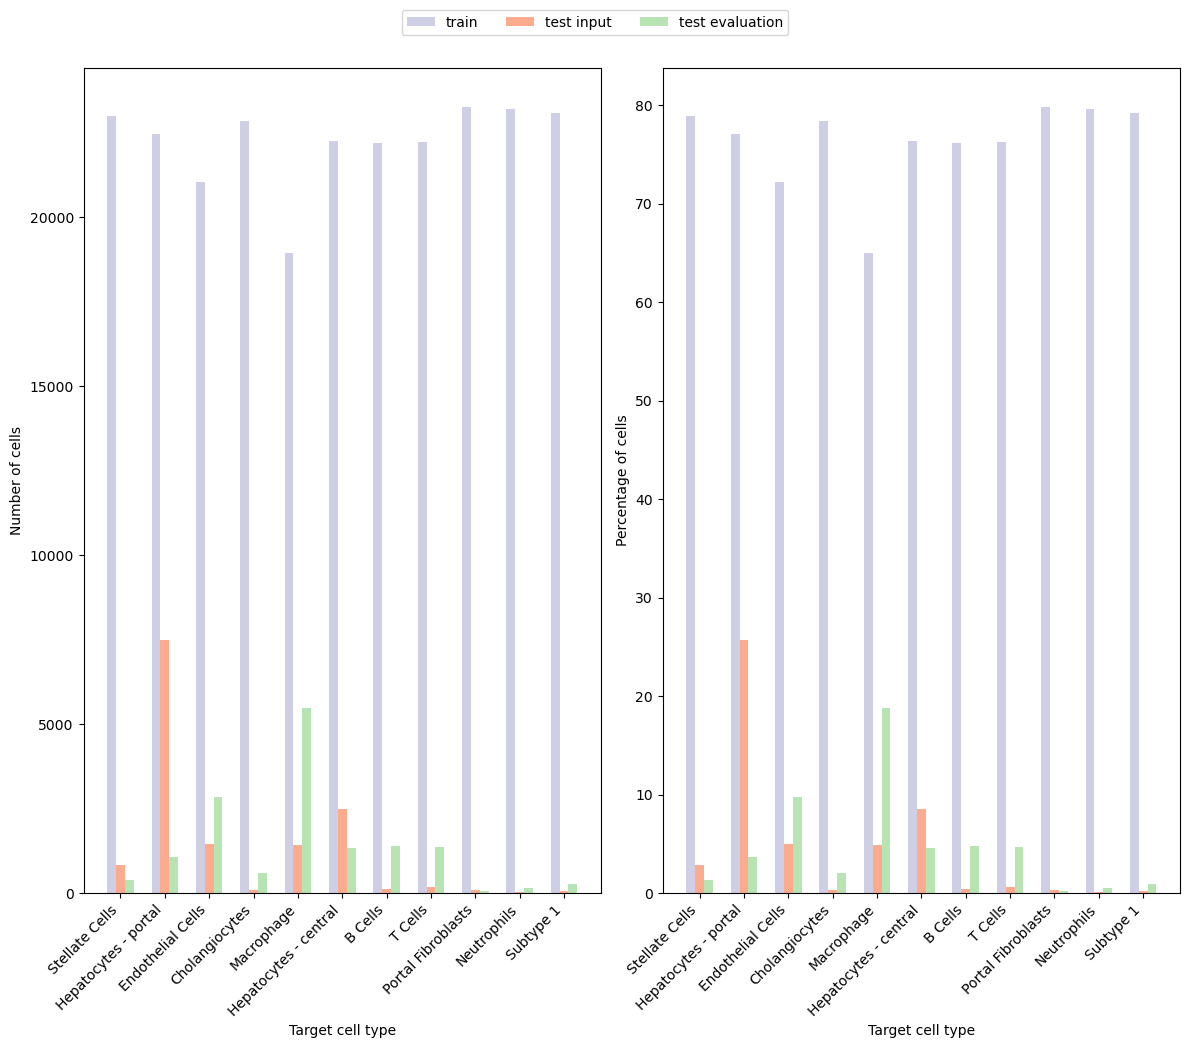

In [6]:
from thesis.datasets import NaultPipeline, NaultSinglePipeline


nault = NaultPipeline()

nault_single = NaultSinglePipeline(
    dataset_pipeline=nault, dosages=30
)

subplot_counts(nault_single, filename='nault_bars_split_30')

Preprocessing started
Preprocessing finished


/home/thodkatz/repos/personal/thesis/thesis/datasets.py:463: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  control.obs["condition"] = "control"
/home/thodkatz/repos/personal/thesis/thesis/datasets.py:464: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  perturb.obs["condition"] = "stimulated"


Stellate Cells: train=17720, ctrl test=826, stim test=608
Hepatocytes - portal: train=14242, ctrl test=7492, stim test=4955
Endothelial Cells: train=17557, ctrl test=1445, stim test=812
Cholangiocytes: train=18139, ctrl test=101, stim test=84
Macrophage: train=17979, ctrl test=1411, stim test=284
Hepatocytes - central: train=17021, ctrl test=2486, stim test=1482
B Cells: train=18136, ctrl test=120, stim test=88
T Cells: train=18098, ctrl test=178, stim test=135
Portal Fibroblasts: train=18173, ctrl test=84, stim test=42
Neutrophils: train=18201, ctrl test=42, stim test=7
Subtype 1: train=18185, ctrl test=60, stim test=27
Stellate Cells: train=17720, ctrl test=826, stim test=608
Stellate Cells with percentage: train=77.82511309236241, ctrl test=3.6277394703324695, stim test=2.6702973340946023
Hepatocytes - portal: train=14242, ctrl test=7492, stim test=4955
Hepatocytes - portal with percentage: train=62.54995827660416, ctrl test=32.90438754446836, stim test=21.762044885590058
Endothelia

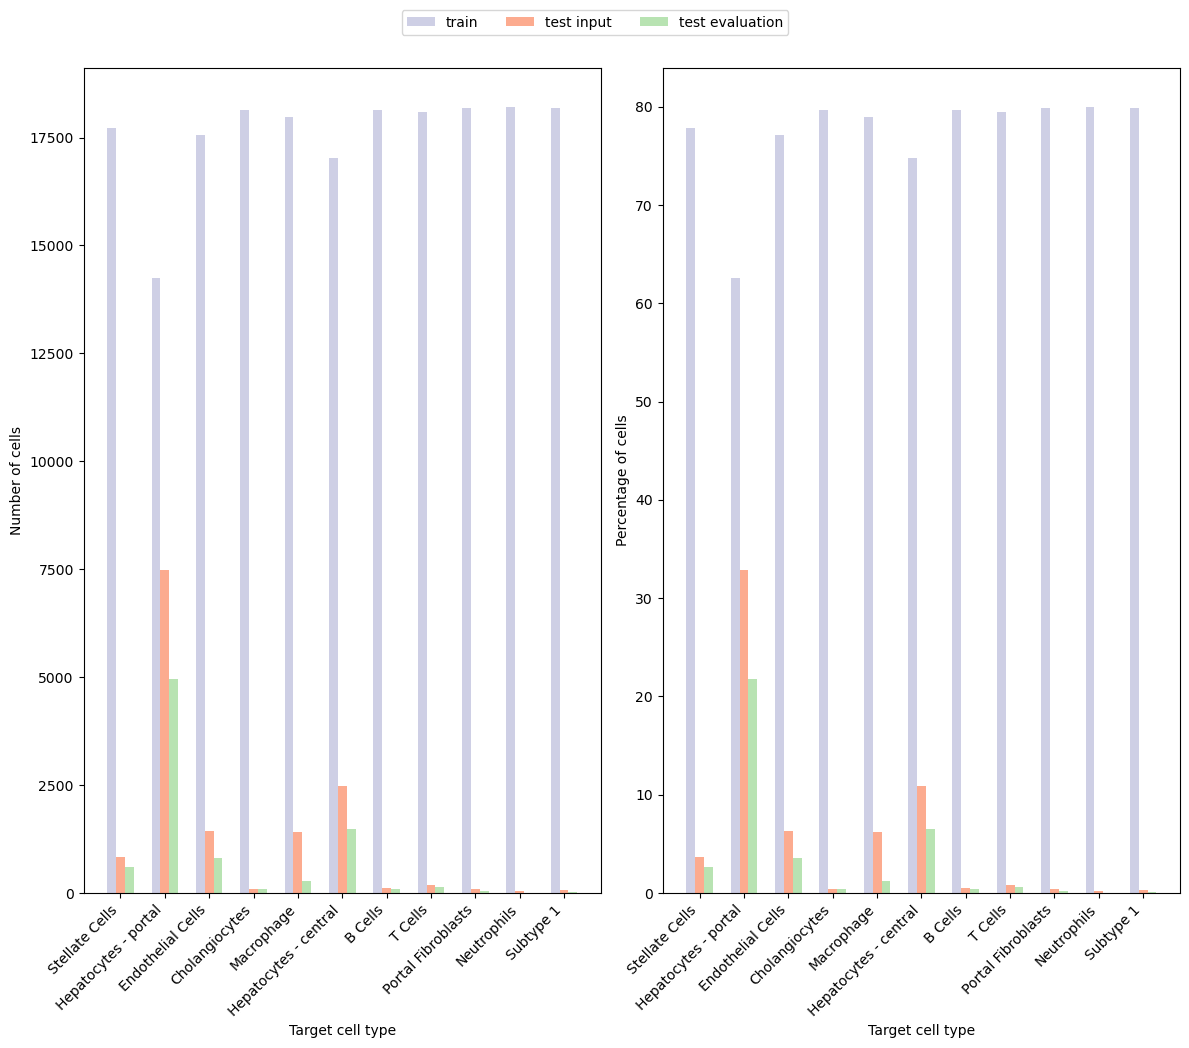

In [7]:
from thesis.datasets import NaultPipeline, NaultSinglePipeline


nault = NaultPipeline()

nault_single = NaultSinglePipeline(
    dataset_pipeline=nault, dosages=0.01
)

subplot_counts(nault_single)

Preprocessing started
Preprocessing finished


/home/thodkatz/repos/personal/thesis/thesis/datasets.py:463: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  control.obs["condition"] = "control"
/home/thodkatz/repos/personal/thesis/thesis/datasets.py:464: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  perturb.obs["condition"] = "stimulated"


Stellate Cells: train=20029, ctrl test=826, stim test=940
Hepatocytes - portal: train=15765, ctrl test=7492, stim test=6271
Endothelial Cells: train=19586, ctrl test=1445, stim test=1494
Cholangiocytes: train=20710, ctrl test=101, stim test=89
Macrophage: train=20312, ctrl test=1411, stim test=587
Hepatocytes - central: train=19361, ctrl test=2486, stim test=1775
B Cells: train=20633, ctrl test=120, stim test=185
T Cells: train=20590, ctrl test=178, stim test=239
Portal Fibroblasts: train=20710, ctrl test=84, stim test=89
Neutrophils: train=20751, ctrl test=42, stim test=38
Subtype 1: train=20754, ctrl test=60, stim test=34
Stellate Cells: train=20029, ctrl test=826, stim test=940
Stellate Cells with percentage: train=77.07611790964364, ctrl test=3.178634649426614, stim test=3.617332409759101
Hepatocytes - portal: train=15765, ctrl test=7492, stim test=6271
Hepatocytes - portal with percentage: train=60.66728238282152, ctrl test=28.8309089509736, stim test=24.1322250442546
Endothelial 

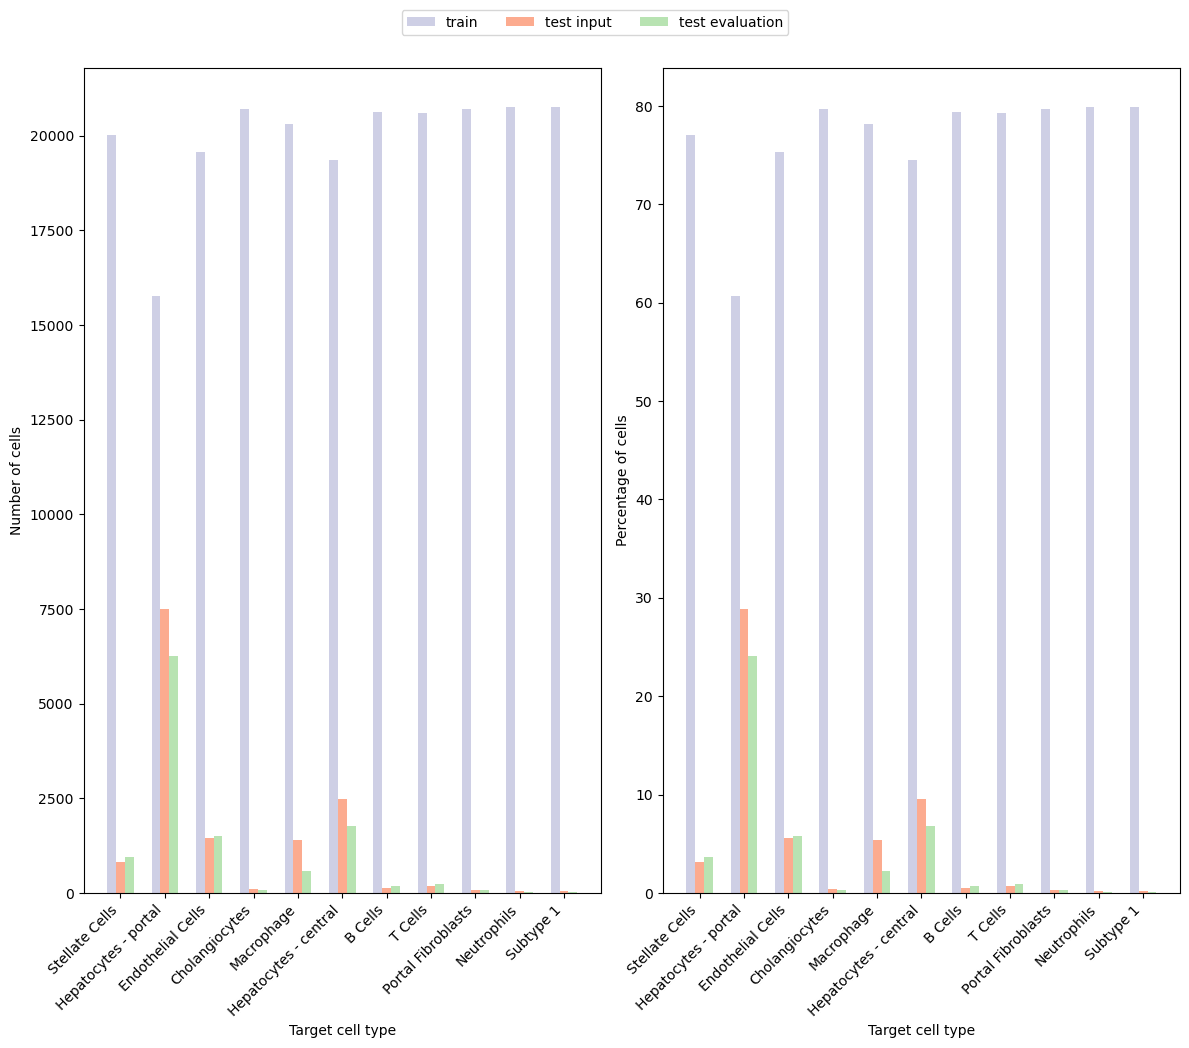

In [8]:
from thesis.datasets import NaultPipeline, NaultSinglePipeline


nault = NaultPipeline()

nault_single = NaultSinglePipeline(
    dataset_pipeline=nault, dosages=0.03
)

subplot_counts(nault_single)

Preprocessing started
Preprocessing finished


/home/thodkatz/repos/personal/thesis/thesis/datasets.py:463: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  control.obs["condition"] = "control"
/home/thodkatz/repos/personal/thesis/thesis/datasets.py:464: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  perturb.obs["condition"] = "stimulated"


Stellate Cells: train=24315, ctrl test=826, stim test=1037
Hepatocytes - portal: train=17900, ctrl test=7492, stim test=9056
Endothelial Cells: train=23552, ctrl test=1445, stim test=1991
Cholangiocytes: train=25040, ctrl test=101, stim test=131
Macrophage: train=24081, ctrl test=1411, stim test=1329
Hepatocytes - central: train=22823, ctrl test=2486, stim test=2902
B Cells: train=24959, ctrl test=120, stim test=232
T Cells: train=24868, ctrl test=178, stim test=346
Portal Fibroblasts: train=25072, ctrl test=84, stim test=90
Neutrophils: train=25117, ctrl test=42, stim test=34
Subtype 1: train=25104, ctrl test=60, stim test=51
Stellate Cells: train=24315, ctrl test=826, stim test=1037
Stellate Cells with percentage: train=77.32794809820633, ctrl test=2.626892252894034, stim test=3.2979264724589745
Hepatocytes - portal: train=17900, ctrl test=7492, stim test=9056
Hepatocytes - portal with percentage: train=56.92659966925328, ctrl test=23.826485180002543, stim test=28.80040707289149
Endo

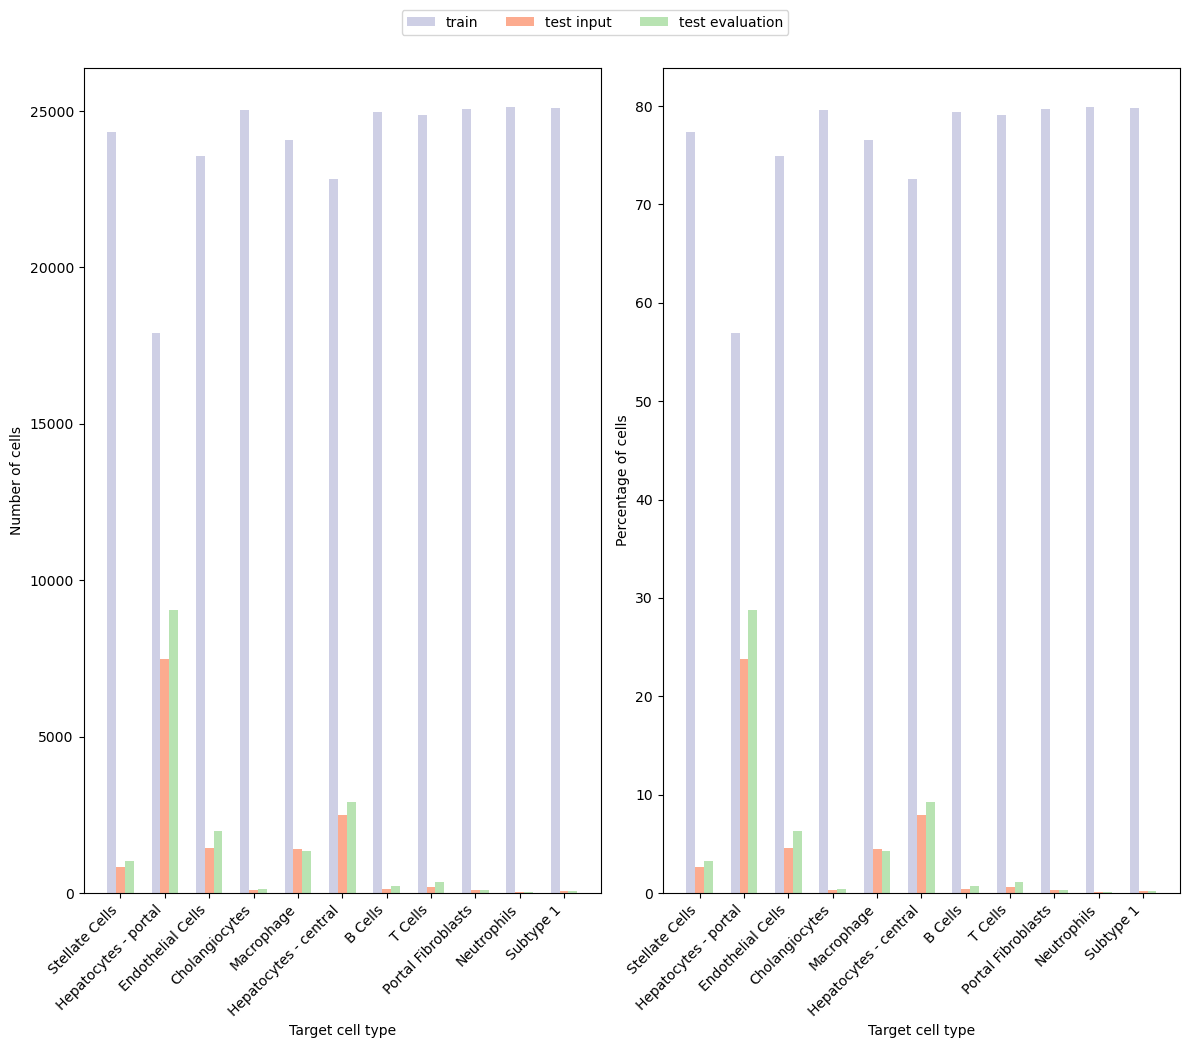

In [9]:
from thesis.datasets import NaultPipeline, NaultSinglePipeline


nault = NaultPipeline()

nault_single = NaultSinglePipeline(
    dataset_pipeline=nault, dosages=0.1
)

subplot_counts(nault_single)

Preprocessing started
Preprocessing finished


/home/thodkatz/repos/personal/thesis/thesis/datasets.py:463: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  control.obs["condition"] = "control"
/home/thodkatz/repos/personal/thesis/thesis/datasets.py:464: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  perturb.obs["condition"] = "stimulated"


Stellate Cells: train=23034, ctrl test=826, stim test=1107
Hepatocytes - portal: train=16999, ctrl test=7492, stim test=8651
Endothelial Cells: train=22523, ctrl test=1445, stim test=1746
Cholangiocytes: train=23828, ctrl test=101, stim test=114
Macrophage: train=22867, ctrl test=1411, stim test=1316
Hepatocytes - central: train=22099, ctrl test=2486, stim test=2276
B Cells: train=23783, ctrl test=120, stim test=171
T Cells: train=23785, ctrl test=178, stim test=168
Portal Fibroblasts: train=23881, ctrl test=84, stim test=48
Neutrophils: train=23903, ctrl test=42, stim test=20
Subtype 1: train=23879, ctrl test=60, stim test=50
Stellate Cells: train=23034, ctrl test=826, stim test=1107
Stellate Cells with percentage: train=77.00588392618347, ctrl test=2.7614335383792454, stim test=3.700855843808505
Hepatocytes - portal: train=16999, ctrl test=7492, stim test=8651
Hepatocytes - portal with percentage: train=56.83003476865473, ctrl test=25.046803958277614, stim test=28.921503075688687
End

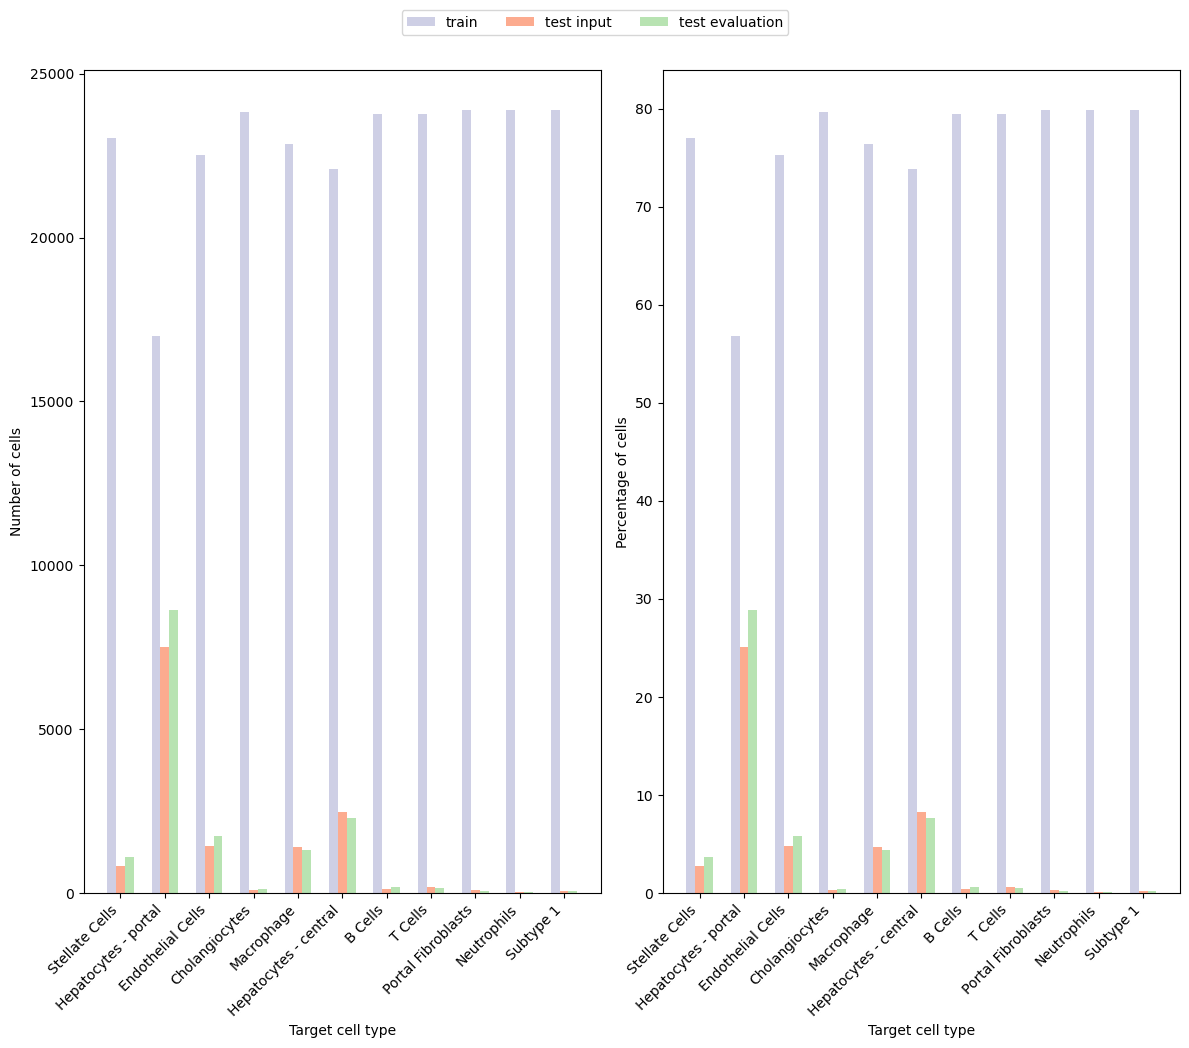

In [10]:
from thesis.datasets import NaultPipeline, NaultSinglePipeline


nault = NaultPipeline()

nault_single = NaultSinglePipeline(
    dataset_pipeline=nault, dosages=0.3
)

subplot_counts(nault_single)

Preprocessing started
Preprocessing finished


/home/thodkatz/repos/personal/thesis/thesis/datasets.py:463: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  control.obs["condition"] = "control"
/home/thodkatz/repos/personal/thesis/thesis/datasets.py:464: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  perturb.obs["condition"] = "stimulated"


Stellate Cells: train=22085, ctrl test=826, stim test=752
Hepatocytes - portal: train=17478, ctrl test=7492, stim test=6511
Endothelial Cells: train=20987, ctrl test=1445, stim test=2124
Cholangiocytes: train=22622, ctrl test=101, stim test=80
Macrophage: train=21694, ctrl test=1411, stim test=1240
Hepatocytes - central: train=20604, ctrl test=2486, stim test=2603
B Cells: train=22420, ctrl test=120, stim test=333
T Cells: train=22392, ctrl test=178, stim test=368
Portal Fibroblasts: train=22659, ctrl test=84, stim test=34
Neutrophils: train=22664, ctrl test=42, stim test=28
Subtype 1: train=22646, ctrl test=60, stim test=51
Stellate Cells: train=22085, ctrl test=826, stim test=752
Stellate Cells with percentage: train=77.84906059431069, ctrl test=2.9116288906905425, stim test=2.6507807818393316
Hepatocytes - portal: train=17478, ctrl test=7492, stim test=6511
Hepatocytes - portal with percentage: train=61.609503331100846, ctrl test=26.409108533963128, stim test=22.95110860446262
Endot

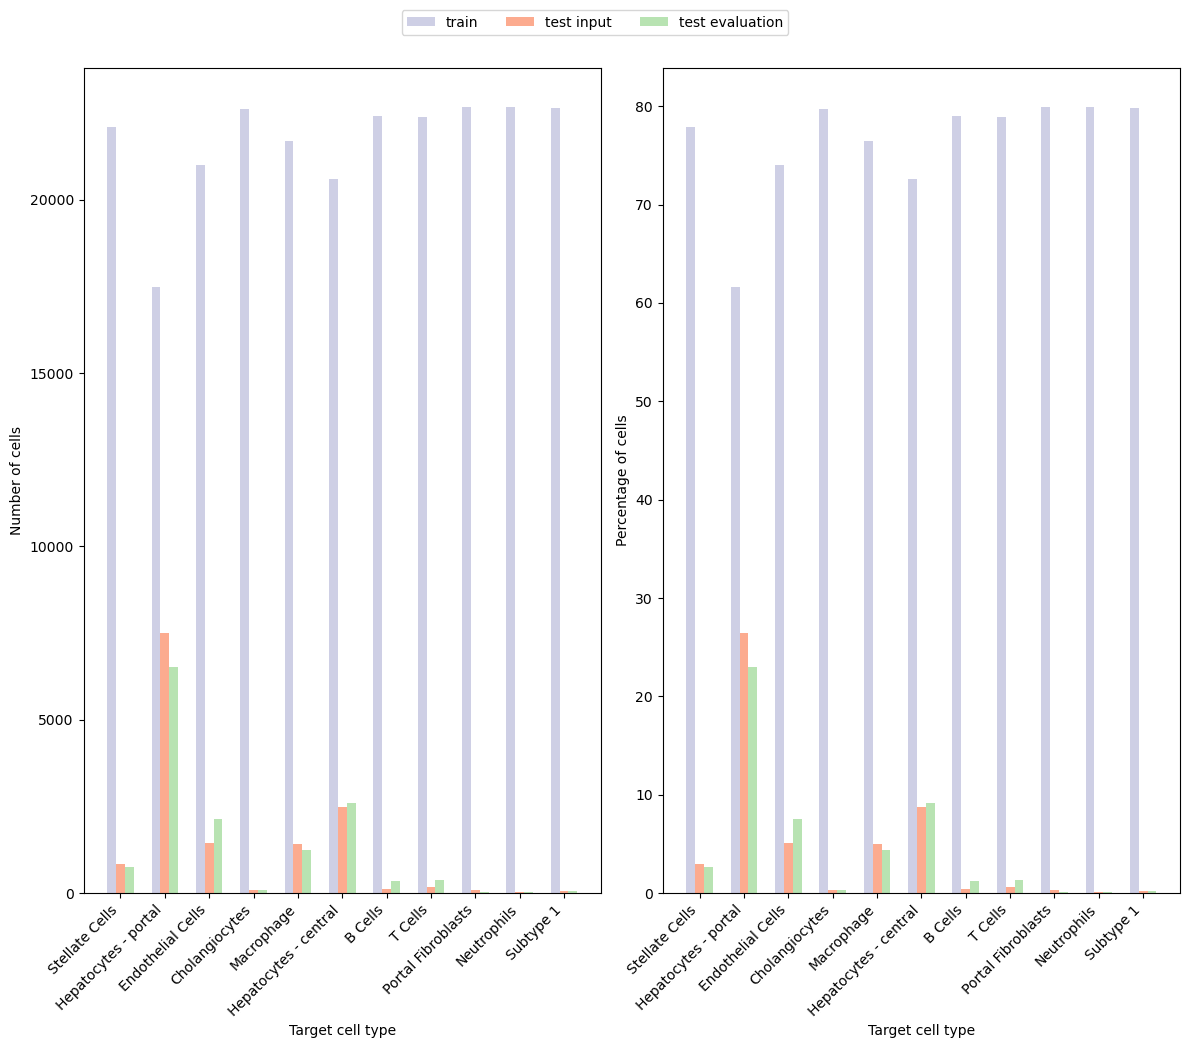

In [11]:
from thesis.datasets import NaultPipeline, NaultSinglePipeline


nault = NaultPipeline()

nault_single = NaultSinglePipeline(
    dataset_pipeline=nault, dosages=1
)

subplot_counts(nault_single)

Preprocessing started
Preprocessing finished


/home/thodkatz/repos/personal/thesis/thesis/datasets.py:463: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  control.obs["condition"] = "control"
/home/thodkatz/repos/personal/thesis/thesis/datasets.py:464: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  perturb.obs["condition"] = "stimulated"


Stellate Cells: train=20830, ctrl test=826, stim test=549
Hepatocytes - portal: train=16581, ctrl test=7492, stim test=5860
Endothelial Cells: train=20359, ctrl test=1445, stim test=1138
Cholangiocytes: train=21213, ctrl test=101, stim test=70
Macrophage: train=20061, ctrl test=1411, stim test=1511
Hepatocytes - central: train=19326, ctrl test=2486, stim test=2429
B Cells: train=21024, ctrl test=120, stim test=307
T Cells: train=21029, ctrl test=178, stim test=301
Portal Fibroblasts: train=21193, ctrl test=84, stim test=95
Neutrophils: train=21243, ctrl test=42, stim test=33
Subtype 1: train=21222, ctrl test=60, stim test=59
Stellate Cells: train=20830, ctrl test=826, stim test=549
Stellate Cells with percentage: train=78.31710343271797, ctrl test=3.1056134150468098, stim test=2.0641425724705793
Hepatocytes - portal: train=16581, ctrl test=7492, stim test=5860
Hepatocytes - portal with percentage: train=62.341617475655156, ctrl test=28.168590442531112, stim test=22.03256006316502
Endot

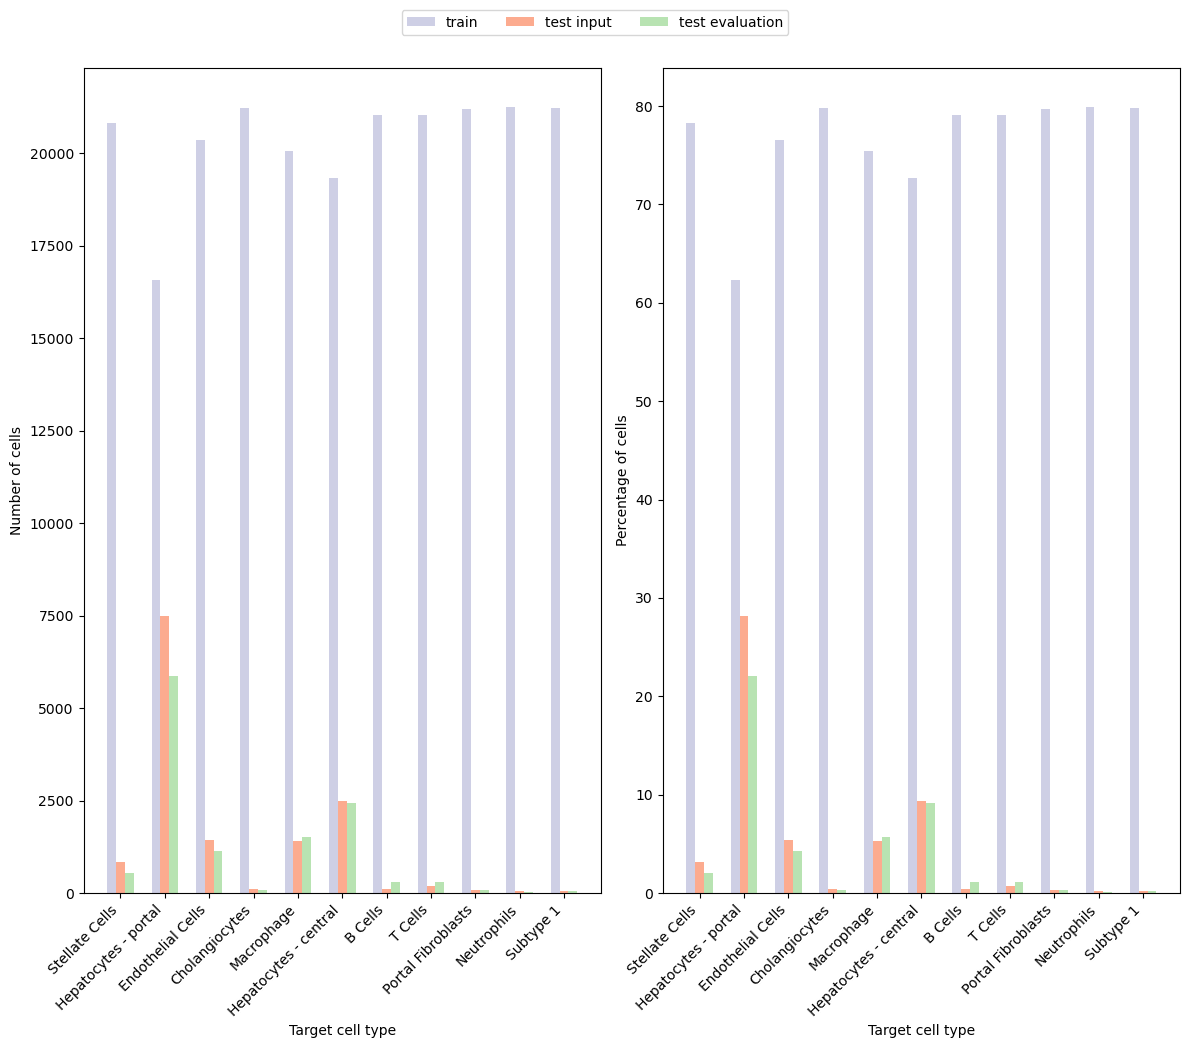

In [12]:
from thesis.datasets import NaultPipeline, NaultSinglePipeline


nault = NaultPipeline()

nault_single = NaultSinglePipeline(
    dataset_pipeline=nault, dosages=3
)

subplot_counts(nault_single)

Preprocessing started
Preprocessing finished


/home/thodkatz/repos/personal/thesis/thesis/datasets.py:463: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  control.obs["condition"] = "control"
/home/thodkatz/repos/personal/thesis/thesis/datasets.py:464: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  perturb.obs["condition"] = "stimulated"


Stellate Cells: train=24549, ctrl test=826, stim test=1109
Hepatocytes - portal: train=19941, ctrl test=7492, stim test=6869
Endothelial Cells: train=23944, ctrl test=1445, stim test=1865
Cholangiocytes: train=25302, ctrl test=101, stim test=168
Macrophage: train=23729, ctrl test=1411, stim test=2134
Hepatocytes - central: train=22453, ctrl test=2486, stim test=3729
B Cells: train=24900, ctrl test=120, stim test=671
T Cells: train=24891, ctrl test=178, stim test=682
Portal Fibroblasts: train=25368, ctrl test=84, stim test=85
Neutrophils: train=25380, ctrl test=42, stim test=71
Subtype 1: train=25294, ctrl test=60, stim test=178
Stellate Cells: train=24549, ctrl test=826, stim test=1109
Stellate Cells with percentage: train=77.1835502735333, ctrl test=2.5969942778092183, stim test=3.4867635037414324
Hepatocytes - portal: train=19941, ctrl test=7492, stim test=6869
Hepatocytes - portal with percentage: train=62.69571778909639, ctrl test=23.555304030686035, stim test=21.596554109287556
En

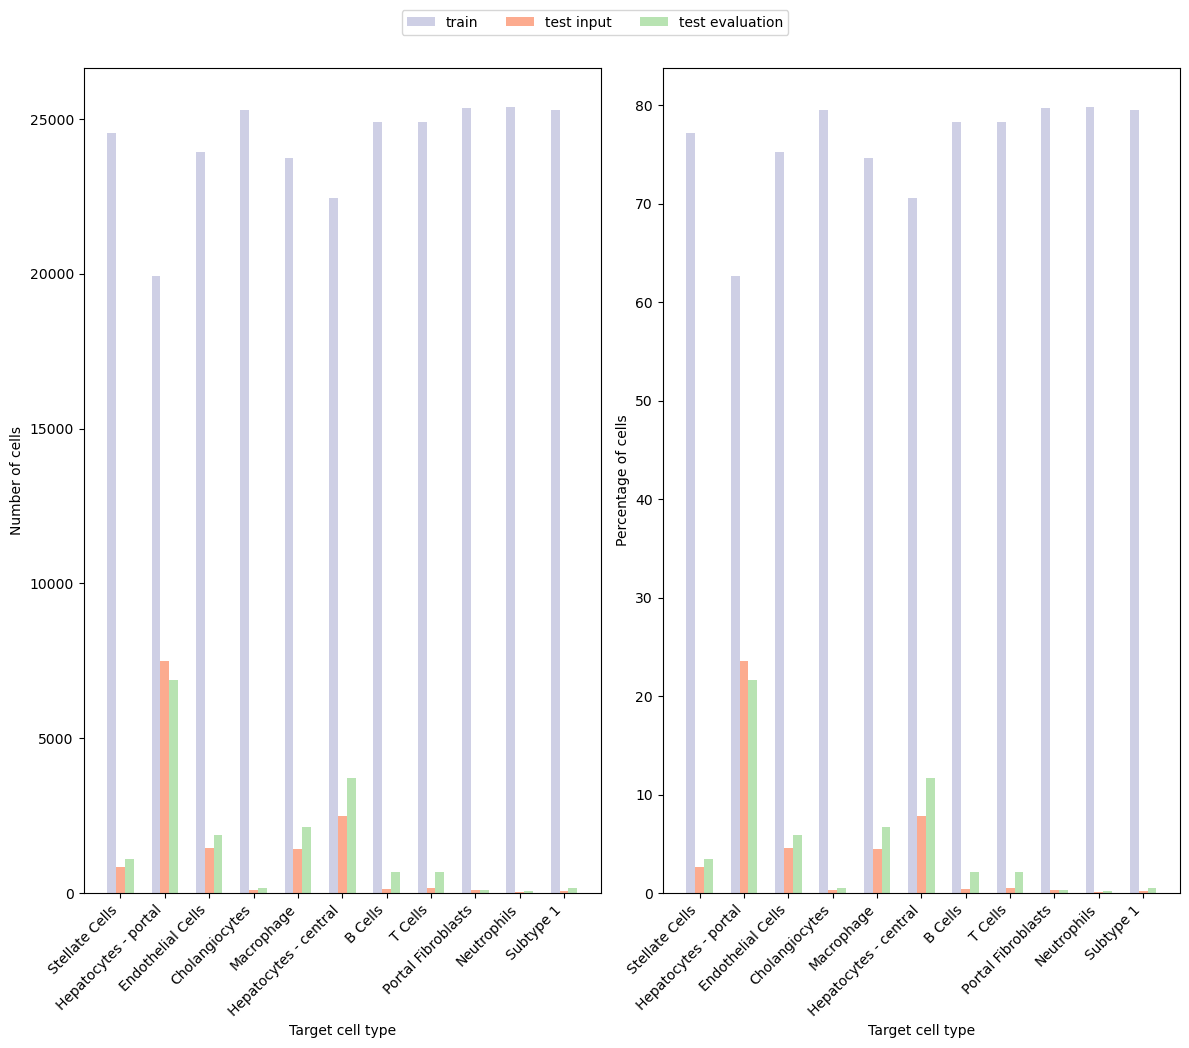

In [13]:
from thesis.datasets import NaultPipeline, NaultSinglePipeline


nault = NaultPipeline()

nault_single = NaultSinglePipeline(
    dataset_pipeline=nault, dosages=10
)

subplot_counts(nault_single)

Preprocessing started
Preprocessing finished


/g/kreshuk/katzalis/repos/thesis/thesis/datasets.py:463: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  control.obs["condition"] = "control"
/g/kreshuk/katzalis/repos/thesis/thesis/datasets.py:464: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  perturb.obs["condition"] = "stimulated"


Stellate Cells: train=14648, ctrl test=826, stim test=389
Hepatocytes - portal: train=14118, ctrl test=7492, stim test=1052
Endothelial Cells: train=12691, ctrl test=1445, stim test=2836
Cholangiocytes: train=14482, ctrl test=101, stim test=597
Hepatocytes - central: train=13899, ctrl test=2486, stim test=1325
Portal Fibroblasts: train=14901, ctrl test=84, stim test=73
Stellate Cells: train=14648, ctrl test=826, stim test=389
Stellate Cells with percentage: train=78.30642574575003, ctrl test=4.4156954987704475, stim test=2.0795466695178018
Hepatocytes - portal: train=14118, ctrl test=7492, stim test=1052
Hepatocytes - portal with percentage: train=75.47311023201112, ctrl test=40.05132043194697, stim test=5.623864000855341
Endothelial Cells: train=12691, ctrl test=1445, stim test=2836
Endothelial Cells with percentage: train=67.8445418582273, ctrl test=7.724794183684379, stim test=15.160910937667058
Cholangiocytes: train=14482, ctrl test=101, stim test=597
Cholangiocytes with percentage

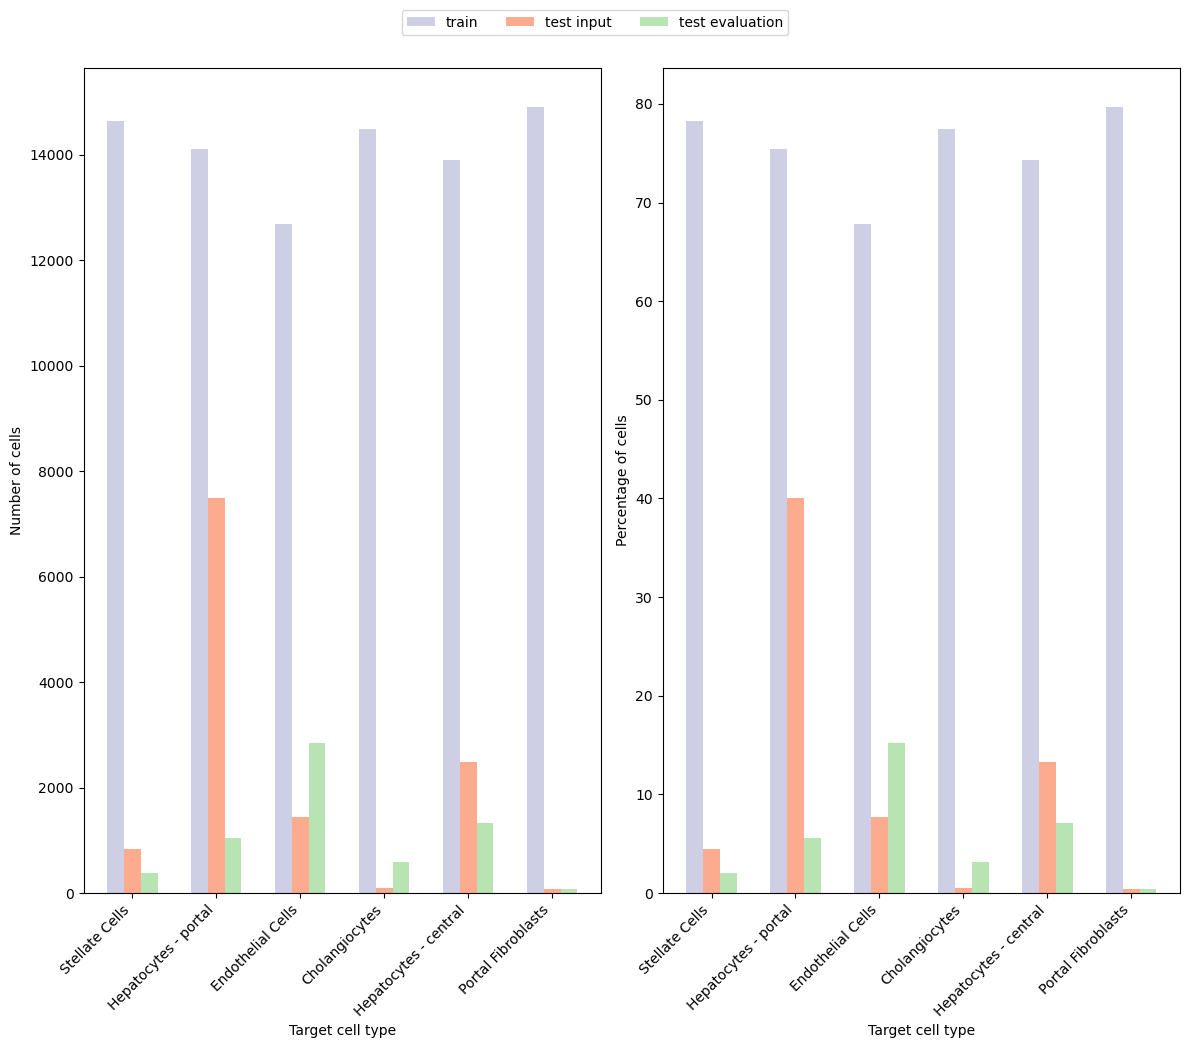

In [18]:
from thesis.datasets import NaultLiverTissuePipeline

nault = NaultLiverTissuePipeline()

nault_single = NaultSinglePipeline(
    dataset_pipeline=nault, dosages=30
)



subplot_counts(nault_single, filename='nault_liver_bars_split_30')

/g/kreshuk/katzalis/repos/thesis/thesis/datasets.py:590: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  control.obs[dose_key] = 0.0
/g/kreshuk/katzalis/repos/thesis/thesis/datasets.py:591: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  perturb.obs[dose_key] = -1.0


CD4T: train=12304, ctrl test=2715, stim test=3483
Dendritic: train=14673, ctrl test=670, stim test=522
CD14+Mono: train=14532, ctrl test=2184, stim test=698
CD8T: train=14615, ctrl test=643, stim test=594
FCGR3A+Mono: train=12858, ctrl test=1232, stim test=2790
NK: train=14504, ctrl test=571, stim test=733
B: train=14206, ctrl test=928, stim test=1105
CD4T: train=12304, ctrl test=2715, stim test=3483
CD4T with percentage: train=65.21093915624337, ctrl test=14.38944244223023, stim test=18.459826160695357
Dendritic: train=14673, ctrl test=670, stim test=522
Dendritic with percentage: train=77.76658893364427, ctrl test=3.550985796056816, stim test=2.7665889336442655
CD14+Mono: train=14532, ctrl test=2184, stim test=698
CD14+Mono with percentage: train=77.01929192283231, ctrl test=11.575153699385202, stim test=3.69938520245919
CD8T: train=14615, ctrl test=643, stim test=594
CD8T with percentage: train=77.45919016323934, ctrl test=3.407886368454526, stim test=3.1481874072503713
FCGR3A+Mono:

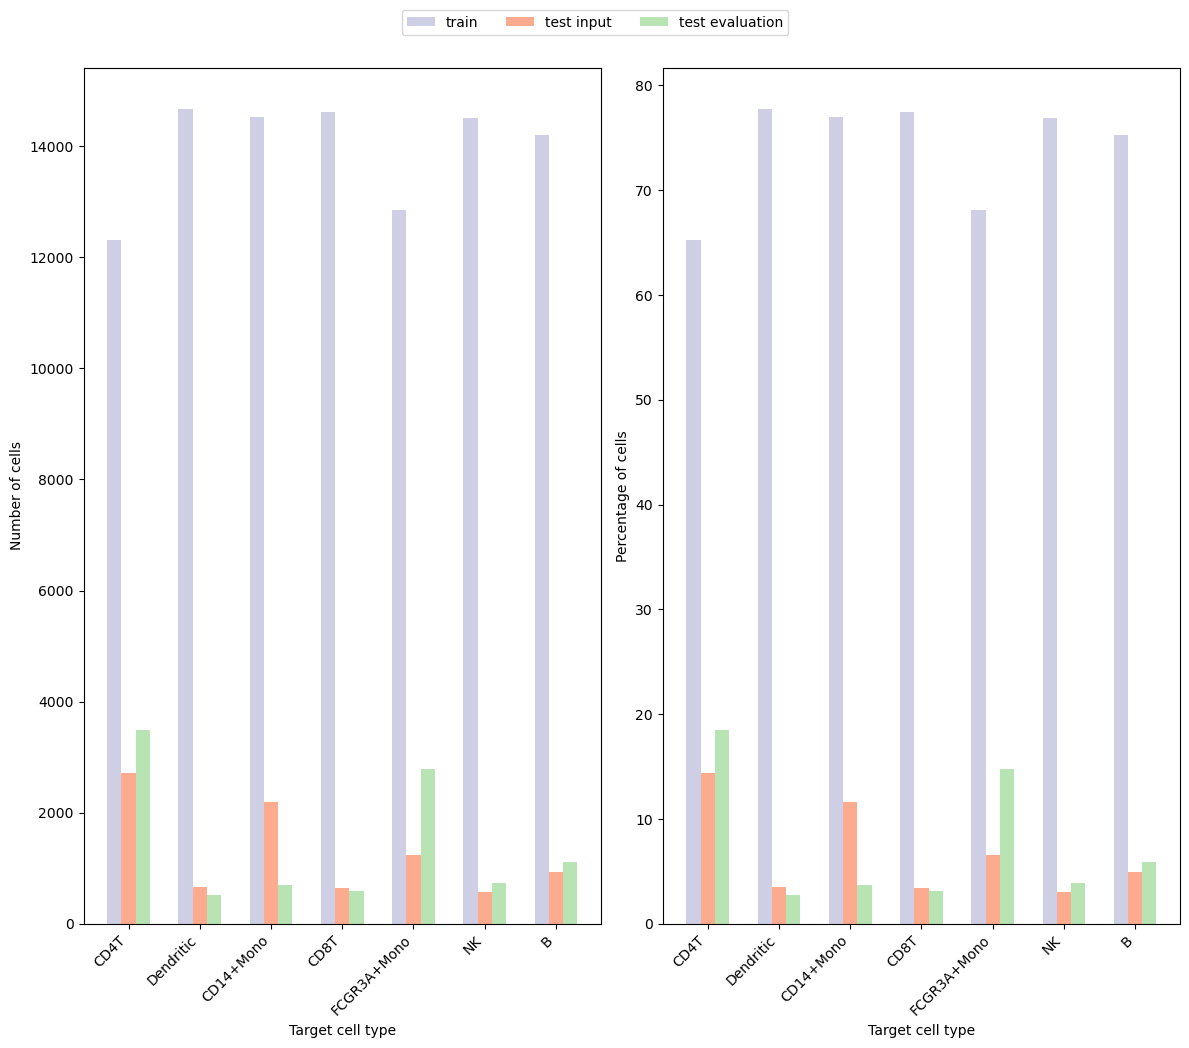

In [19]:
from thesis.datasets import PbmcPipeline, PbmcSinglePipeline

pbmc = PbmcPipeline()

pbmc_single = PbmcSinglePipeline(
    dataset_pipeline=pbmc
)

subplot_counts(pbmc_single, filename='pbmc_bars_split')


/home/thodkatz/repos/personal/thesis/thesis/datasets.py:615: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  control.obs[dose_key] = 0.0
/home/thodkatz/repos/personal/thesis/thesis/datasets.py:616: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  perturb.obs[dose_key] = -1.0


rabbit: train=54967, ctrl test=11088, stim test=8930
pig: train=57287, ctrl test=10587, stim test=6031
rat: train=52717, ctrl test=10438, stim test=11743
mouse: train=54663, ctrl test=9515, stim test=9310
rabbit: train=54967, ctrl test=11088, stim test=8930
rabbit with percentage: train=70.79544576389067, ctrl test=14.280930424254915, stim test=11.501506916359702
pig: train=57287, ctrl test=10587, stim test=6031
pig with percentage: train=73.78351922928313, ctrl test=13.635661111254219, stim test=7.76770304731975
rat: train=52717, ctrl test=10438, stim test=11743
rat with percentage: train=67.89752968754024, ctrl test=13.443754668864791, stim test=15.12454599314804
mouse: train=54663, ctrl test=9515, stim test=9310
mouse with percentage: train=70.40390510290821, ctrl test=12.254965096210814, stim test=11.990932742587775


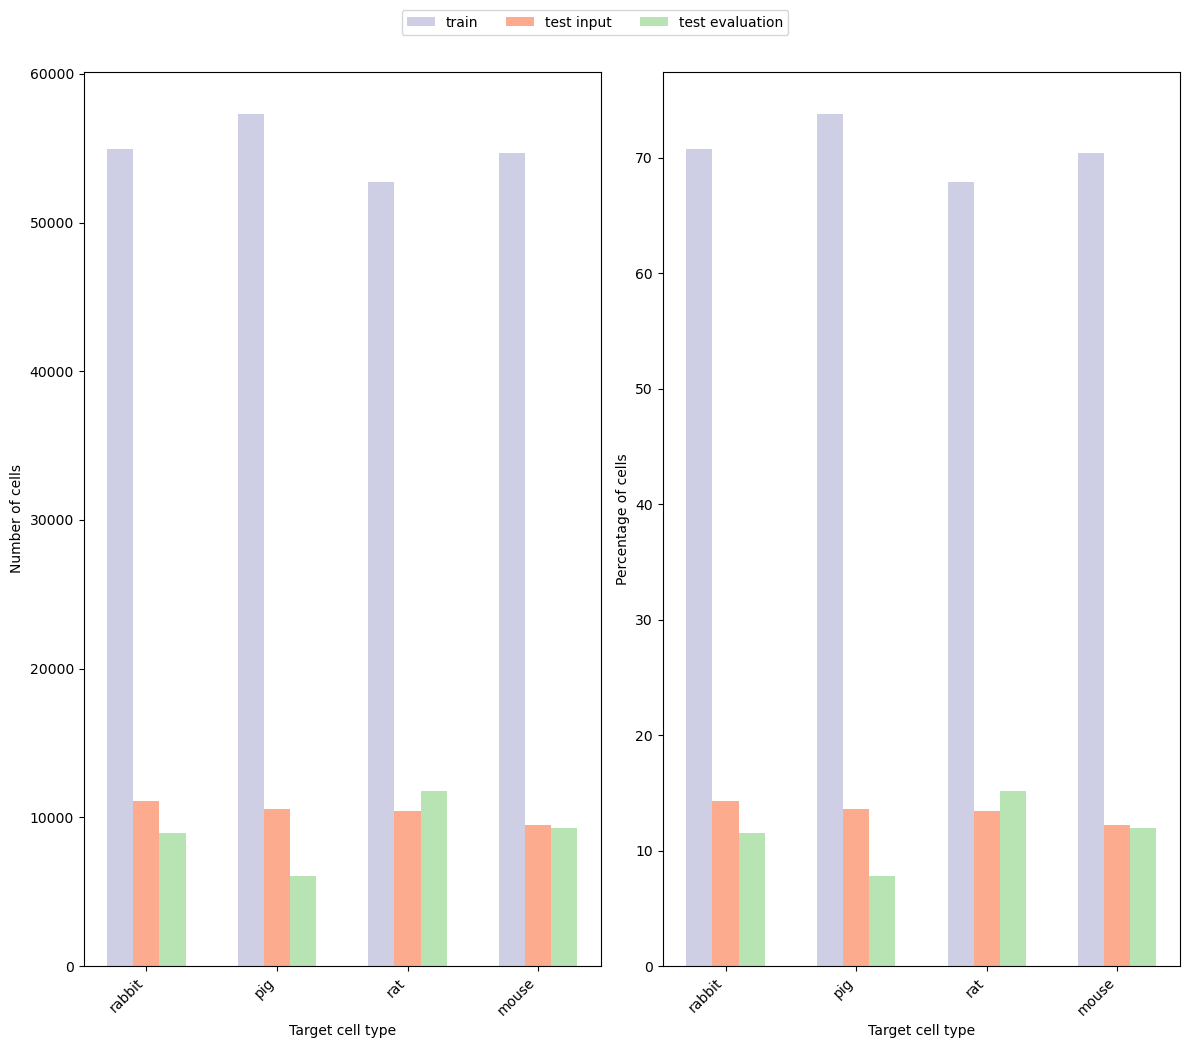

In [4]:
from thesis.datasets import CrossSpeciesPipeline, CrossSpeciesConditionPipeline

cross_species = CrossSpeciesPipeline()

cross_species_condition = CrossSpeciesConditionPipeline(
    dataset_pipeline=cross_species
)



subplot_counts(cross_species_condition)